In [1]:
import os
import sys
import json
import pprint #pretty print
import glob
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
print sys.version
print "Pandas: ",pd.version.version
from __future__ import division
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics



from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split


np.random.seed(125)

2.7.6 |Anaconda 2.3.0 (64-bit)| (default, May 27 2014, 15:00:33) [MSC v.1500 64 bit (AMD64)]
Pandas:  0.16.2


In [2]:
bank_telemarket_df=pd.read_csv("C:/Users/dxk277/Desktop/Project/python/Metis_Project_2/data/bank/bank.csv",sep=';')

In [3]:
print bank_telemarket_df.columns
bank_telemarket_df.head()

Index([u'age', u'job', u'marital', u'education', u'default', u'balance',
       u'housing', u'loan', u'contact', u'day', u'month', u'duration',
       u'campaign', u'pdays', u'previous', u'poutcome', u'y'],
      dtype='object')


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank_telemarket_df=bank_telemarket_df.rename(columns = {'y':'Response'})

In [5]:
bank_telemarket_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
####################################################################################
#Data Type and Sanity Checks
####################################################################################
#Check for null values in movies dataframe
print "Number of rows which are Null by Column Names:\n"
print "\n",len(bank_telemarket_df.index)-bank_telemarket_df.count(),"\n"

Number of rows which are Null by Column Names:


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Response     0
dtype: int64 



In [7]:
for column, column_type in bank_telemarket_df.dtypes.iteritems():
    #print column, str(column_type)
    if str(column_type)!= 'int64':
        if column<>'age':
            print column,"\n\n",bank_telemarket_df[column].value_counts(),"\n"
        else:
            print column,"\n","Min: ",min(map(int,bank_telemarket_df[column])), "Max: ",max(map(int,bank_telemarket_df[column]))

job 

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
dtype: int64 

marital 

married     27214
single      12790
divorced     5207
dtype: int64 

education 

secondary    23202
tertiary     13301
primary       6851
unknown       1857
dtype: int64 

default 

no     44396
yes      815
dtype: int64 

housing 

yes    25130
no     20081
dtype: int64 

loan 

no     37967
yes     7244
dtype: int64 

contact 

cellular     29285
unknown      13020
telephone     2906
dtype: int64 

month 

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
dtype: int64 

poutcome 

unknown    36959
failure     4901
other       1840
success     1511
dtype: int64 

Response 

no     39922
yes 

In [8]:
from sklearn.cross_validation import train_test_split
#df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)

cols=[]
for column, column_type in bank_telemarket_df.dtypes.iteritems():
    #print column, str(column_type)
    if str(column_type)== 'int64':
        cols.append(column)    
print cols
Y=bank_telemarket_df['Response']
#X=bank_telemarket_df.ix[:,:-1]
X=bank_telemarket_df[cols]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33)

print len(X_train),len(X_test)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
30291 14920


In [9]:
log_model=LogisticRegression()
log_model.fit(X_train,Y_train)
pd.DataFrame(log_model.predict(X_test),Y_test)
# check the accuracy on the training set
print "Logistic Regression Model Score: ",log_model.score(X_train, Y_train)
print "\n Accuracy Score:\n", metrics.accuracy_score(Y_test, log_model.predict(X_test))
print "\n Confusion Matrix:\n",metrics.confusion_matrix(Y_test, log_model.predict(X_test))
print "\n Classification Report:\n",metrics.classification_report(Y_test, log_model.predict(X_test))


Logistic Regression Model Score:  0.890000330131

 Accuracy Score:
0.886058981233

 Confusion Matrix:
[[12935   200]
 [ 1500   285]]

 Classification Report:
             precision    recall  f1-score   support

         no       0.90      0.98      0.94     13135
        yes       0.59      0.16      0.25      1785

avg / total       0.86      0.89      0.86     14920



In [10]:
#say_yes = bank_telemarket_df[bank_telemarket_df['Response']=='yes']
#say_no = bank_telemarket_df[bank_telemarket_df['Response']=='no']

In [62]:
#job = set(bank_telemarket_df['job'])

In [63]:
#job_yes = say_yes[['job','Response']].groupby(['job']).count()
#job_no =say_no[['job','Response']].groupby(['job']).count()


In [121]:
#p1 = plt.bar(job, job_yes, 1, color='g')
#p2 = plt.bar(job, job_no, 1, color='r', bottom=job_yes)
#plt.show()


#p1 = job_yes.plot(kind='bar',color='g')
#p2 = job_no.plot(kind='bar',color='r',bottom=job_yes)
#plt.show()

#job_yes.plot(kind='bar')
#job_no.plot(kind='bar')

In [10]:
bank_telemarket_df['Response'].replace(['yes','no'], [1,0], inplace=True)

bank_telemarket_df['Count'] =1

In [ ]:
bank_telemarket_df['education'].unique()
xlabels = bank_telemarket_df['marital'].unique()
#ax = sns.barplot(x="job", y="Count", hue="Response", data=bank_telemarket_df, estimator = np.sum)
ax = sns.factorplot(x="marital", y="Count", hue="Response", data=bank_telemarket_df, estimator = np.sum,kind='bar',size = 6,aspect=2)
ax.set_xticklabels(xlabels, rotation=90)

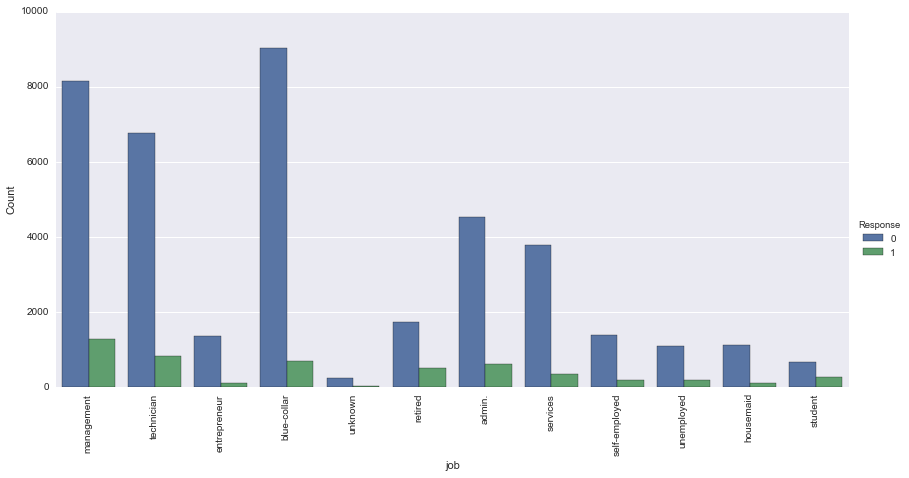

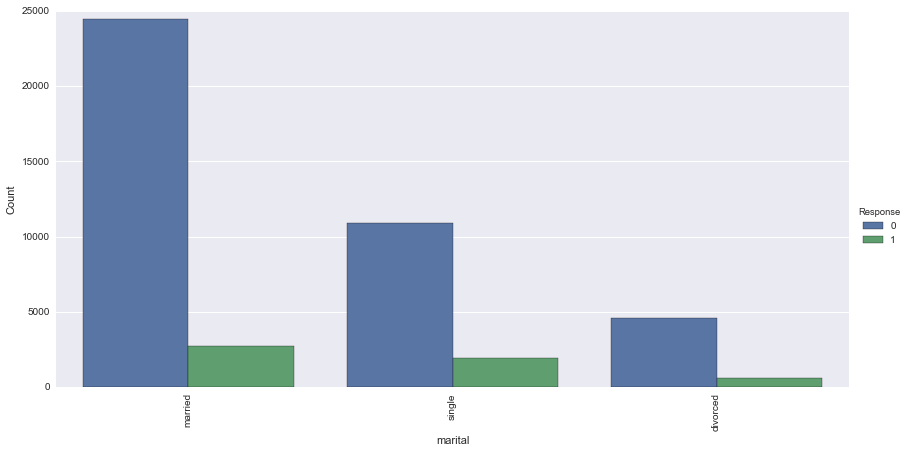

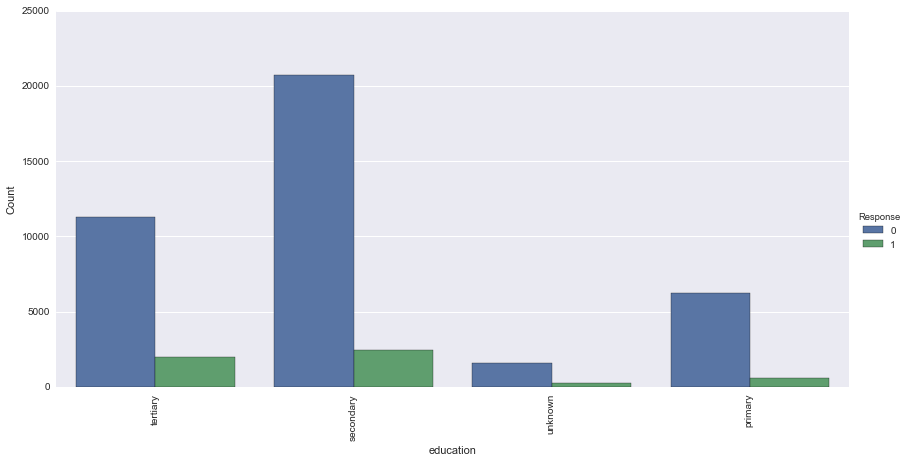

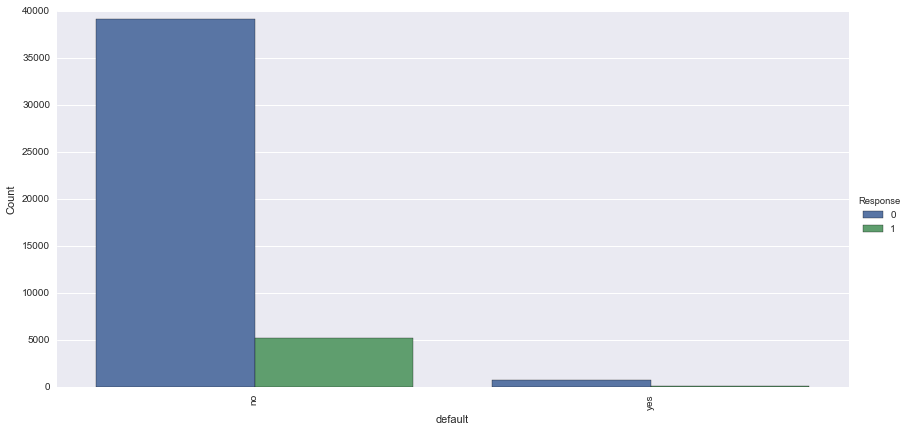

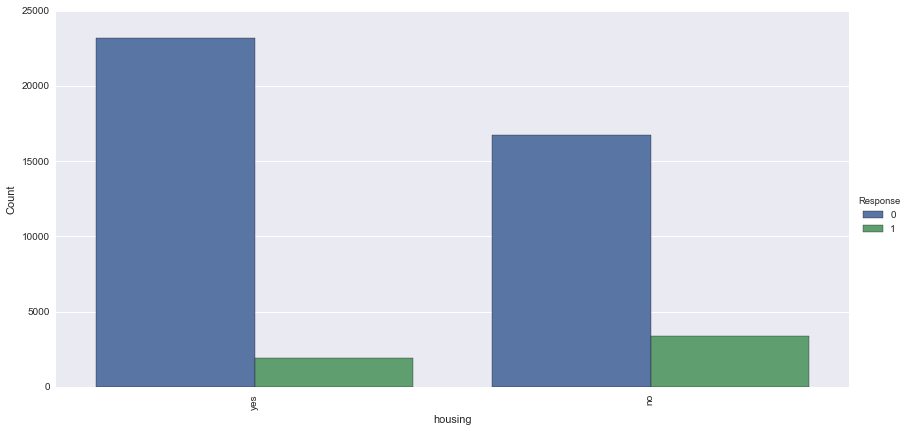

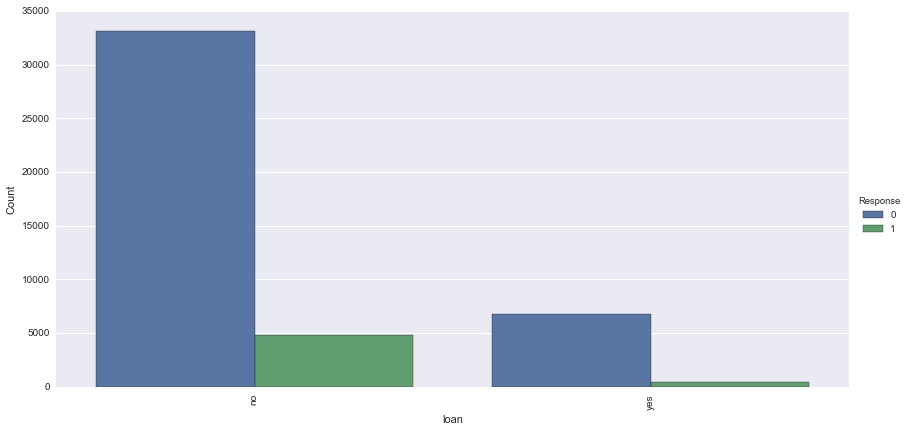

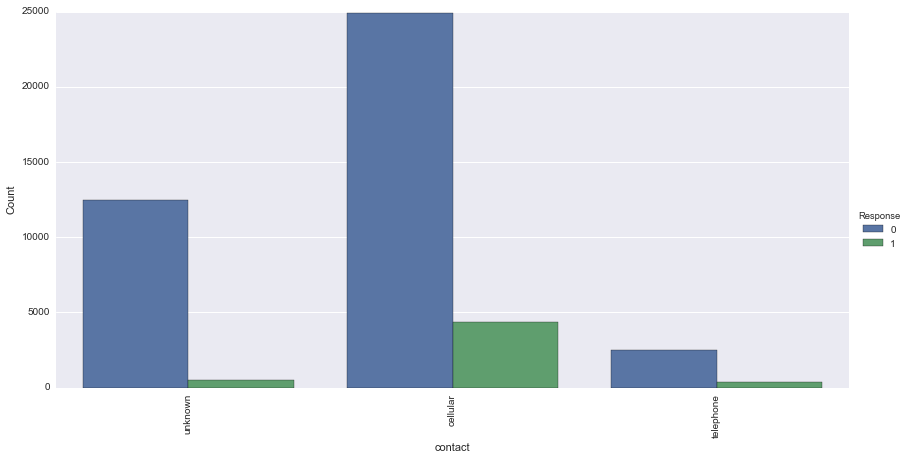

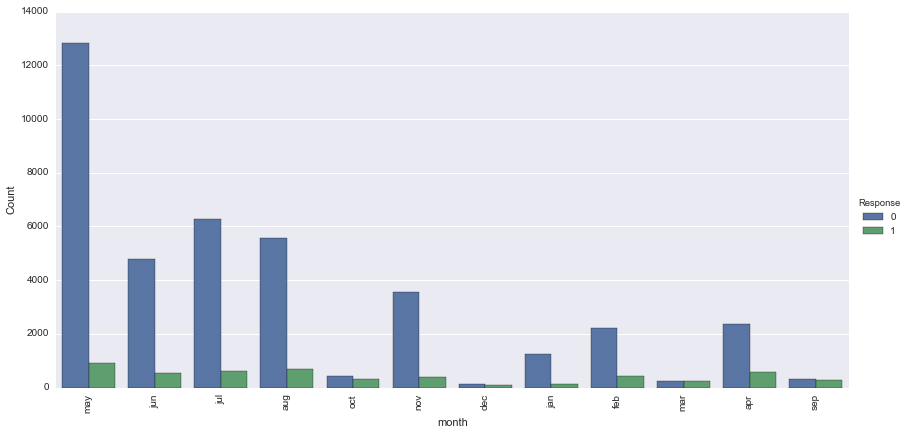

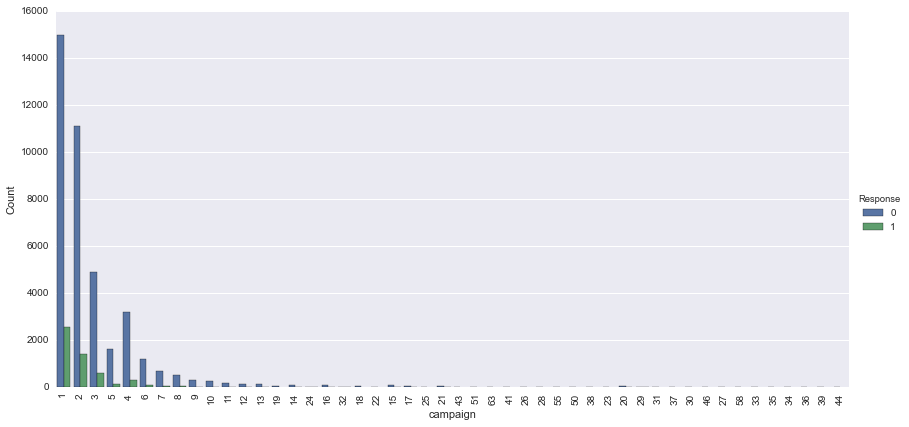

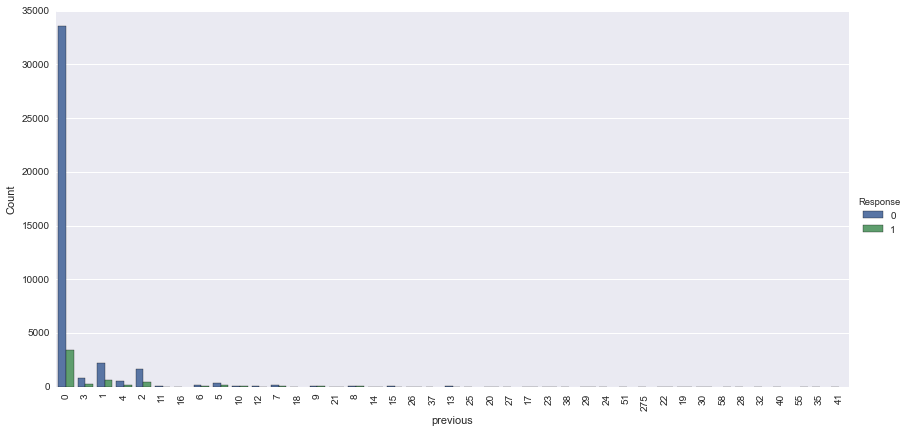

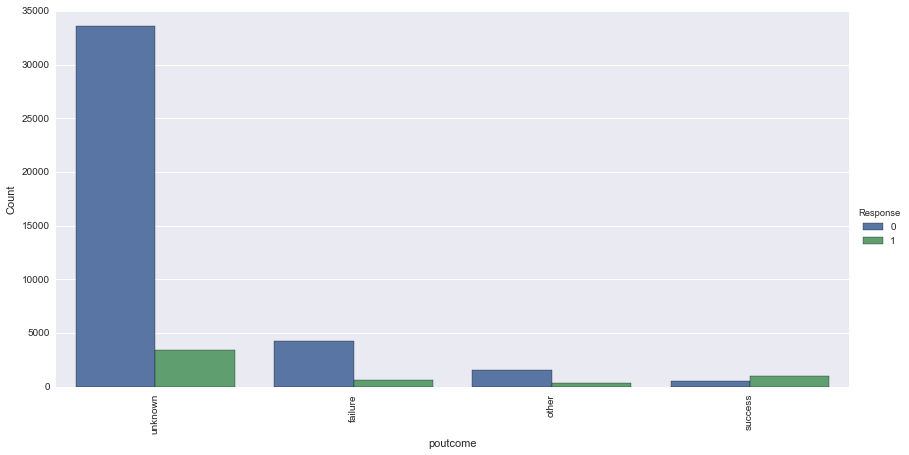

In [11]:
list_of_features = ['job','marital','education','default','housing','loan','contact','month','campaign','previous','poutcome']
for i in list_of_features:
    xlabels=bank_telemarket_df[i].unique()
    ax = sns.factorplot(x=i,y='Count',hue="Response",data=bank_telemarket_df,estimator=np.sum,kind='bar',size=6,aspect=2)
    ax.set_xticklabels(xlabels,rotation=90)

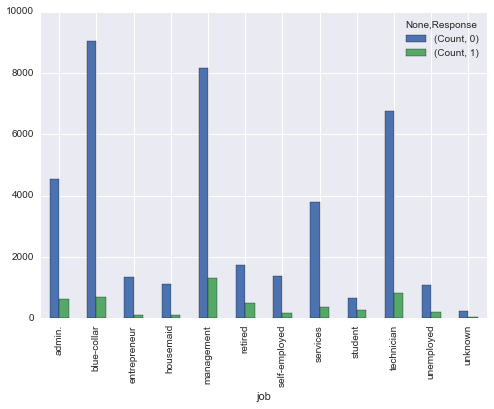

In [12]:
bank_telemarket_df[['job','Response','Count']].groupby(['job', 'Response']).sum().unstack().plot(kind='bar')
#bank_telemarket_df[['Response','job','Count']].groupby(['job', 'Response']).sum().head()

In [13]:
#X = bank_telemarket_df[[i for i in bank_telemarket_df.columns if i!='Response' and i!='Count']]
X = bank_telemarket_df[cols]
Y = bank_telemarket_df['Response']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.30, random_state=4444)


KNN (n=1) accuracy: 0.8489
KNN (n=2) accuracy: 0.8809
KNN (n=3) accuracy: 0.8721
KNN (n=4) accuracy: 0.8806
KNN (n=5) accuracy: 0.8811
KNN (n=6) accuracy: 0.8809
KNN (n=7) accuracy: 0.8830
KNN (n=8) accuracy: 0.8840
KNN (n=9) accuracy: 0.8826
KNN (n=10) accuracy: 0.8835
KNN (n=11) accuracy: 0.8843
KNN (n=12) accuracy: 0.8846
KNN (n=13) accuracy: 0.8845
KNN (n=14) accuracy: 0.8844
KNN (n=15) accuracy: 0.8848
KNN (n=16) accuracy: 0.8853
KNN (n=17) accuracy: 0.8851
KNN (n=18) accuracy: 0.8854
KNN (n=19) accuracy: 0.8865
KNN max accuracy: 0.8865


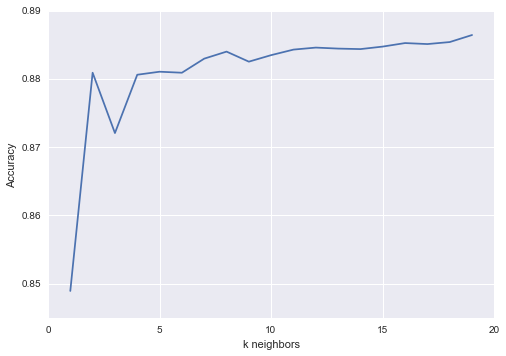

In [14]:
accs = []
for n in range(1,20):
    model = KNeighborsClassifier(n_neighbors=n).fit(X_train,Y_train)
    Y_test_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_test_pred)
    accs.append(accuracy)
    print 'KNN (n=%i) accuracy: %.4f' % (n,accuracy)

print 'KNN max accuracy: %.4f' % max(accs)
plt.plot(range(1,20), accs)
plt.xlabel('k neighbors')
plt.ylabel('Accuracy')

In [54]:
# using 1 percentile as flooring, and 99 percentile as capping
def age_group(row):
    if row['age'] <= 33:
        return '1_age<=33'
    elif row['age'] <= 39:
        return '2_age 33~39'
    elif row['age'] <= 48:
        return '3_age 39~48'
    elif row['age'] > 48:
        return '4_age>48'

In [55]:
bank_telemarket_df['age_group'] = bank_telemarket_df.apply (lambda row: age_group(row),axis=1)

In [52]:
print np.percentile(bank_telemarket_df['age'],1)
print np.percentile(bank_telemarket_df['age'],99)

23.0
71.0


In [43]:
def balance_group(row):
    if row['balance'] < 0:
        return 'negative balance'
    elif row['balance'] <= 2500:
        return 'low balance'
    elif row['balance'] > 2500:
        return 'high balance'

In [44]:
bank_telemarket_df['balance_group'] = bank_telemarket_df.apply (lambda row: balance_group(row),axis=1)

In [26]:
print np.percentile(bank_telemarket_df['balance'],1)
print np.percentile(bank_telemarket_df['balance'],99)

-627.0
13164.9


In [27]:
def day_group(row):
    if 0<=row['day'] <= 8:
        return 'begin of month'
    elif row['day'] <= 16:
        return 'early to mid of month'
    elif row['day'] <=21:
        return 'mid to late of month'
    elif 21 < row['day'] <= 31:
        return 'end of month'
    

In [28]:
bank_telemarket_df['day_group'] = bank_telemarket_df.apply(lambda row: day_group(row), axis=1)

In [29]:
def campaign_group(row):
    if row['campaign'] == 1:
        return '1 cont in campaign'
    elif row['campaign'] == 2:
        return '2 conts in campaign'
    elif row['campaign'] == 3:
        return '3 conts in campaign'
    elif row['campaign'] > 3:
        return '>3 conts in campaign'
    

In [30]:
bank_telemarket_df['campaign_group'] = bank_telemarket_df.apply(lambda row: campaign_group(row), axis = 1)

In [31]:
def pdays_group(row):
    if row['pdays'] == -1:
        return 'not previous contacted'
    else:
        return 'being contacted before'

In [32]:
bank_telemarket_df['pdays_group'] = bank_telemarket_df.apply(lambda row: pdays_group(row), axis = 1)

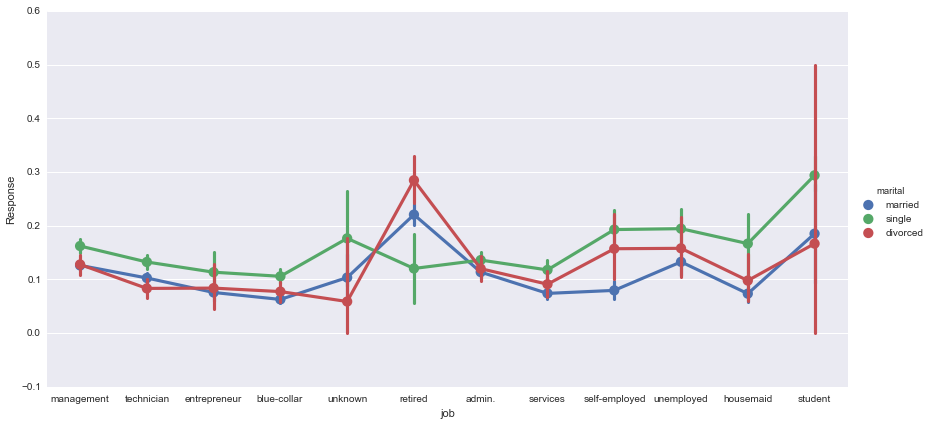

In [35]:
ax = sns.factorplot(x='job',y='Response',hue="marital",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

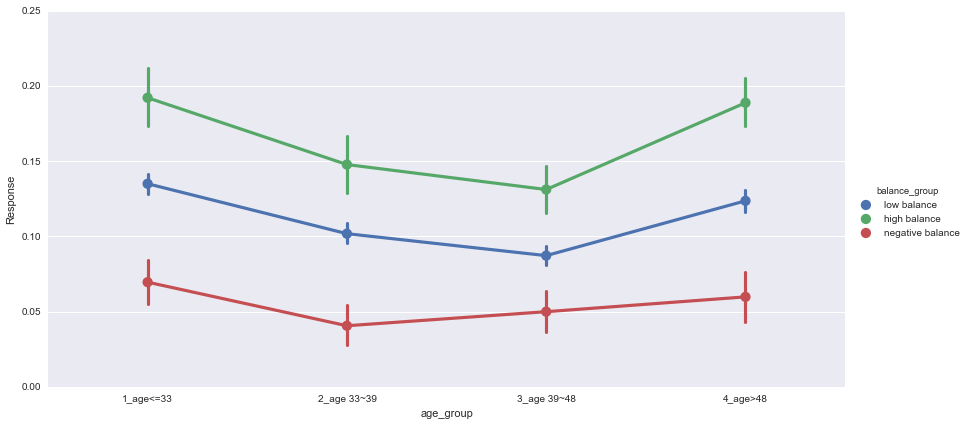

In [58]:
ax = sns.factorplot(x='age_group',y='Response',hue="balance_group",data=bank_telemarket_df.sort('age_group'),estimator=np.mean,size=6,aspect=2)

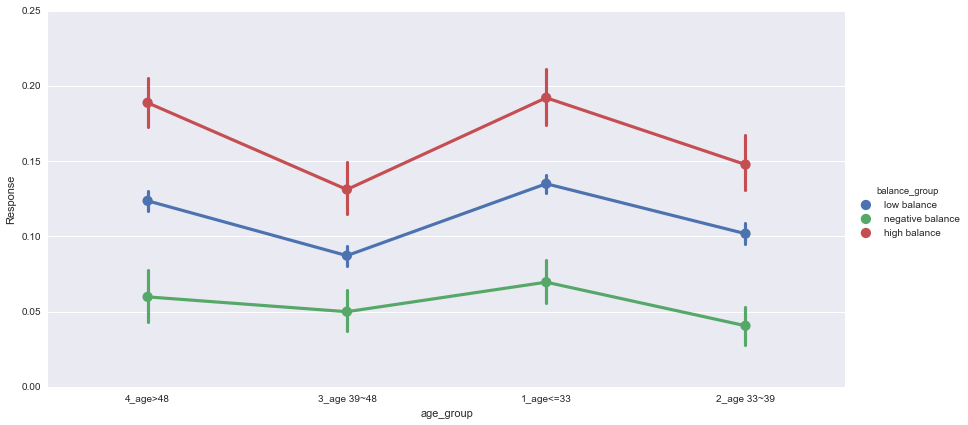

In [59]:
ax = sns.factorplot(x='age_group',y='Response',hue="balance_group",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

# Check Interaction 

##1. job vs. marital

Decision: create indicator of retired&divorced

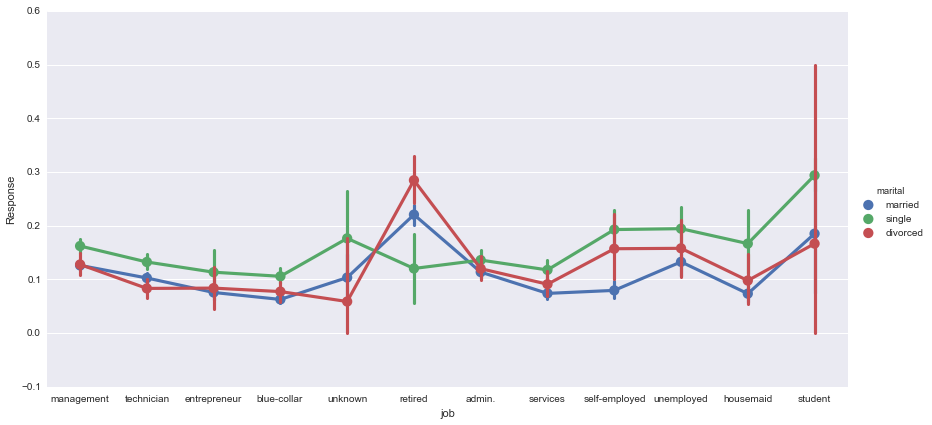

In [60]:
ax = sns.factorplot(x='job',y='Response',hue="marital",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##2. pdays_group vs. age_group

Decision: not to create an indicator being contacted&age>48, due to thin sample, no treatment here

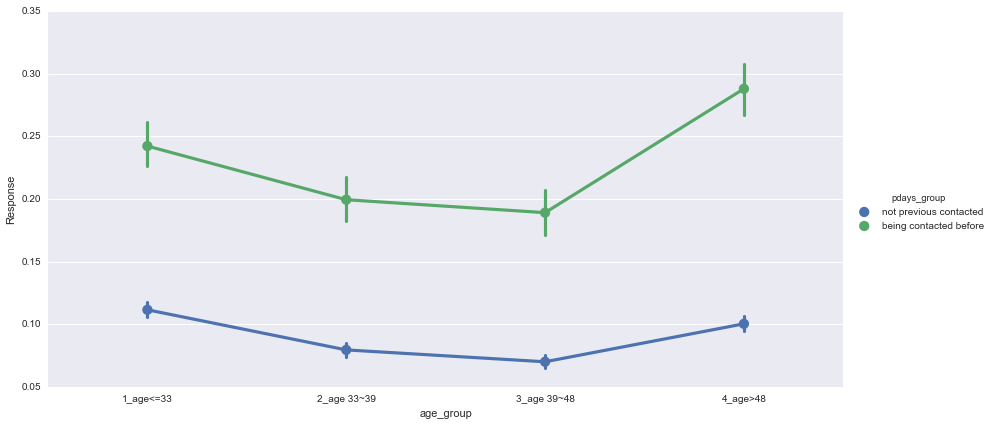

In [63]:
ax = sns.factorplot(x='age_group',y='Response',hue="pdays_group",data=bank_telemarket_df.sort('age_group'),estimator=np.mean,size=6,aspect=2)

##3. job vs. education

Decision: no interaction here

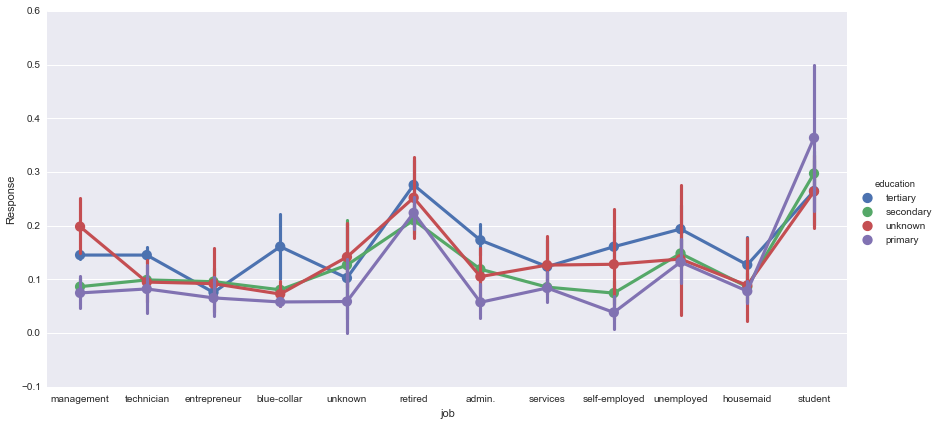

In [71]:
sns.factorplot(x='job',y='Response',hue="education",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##4. job vs. default

Decision: no default with all jobs



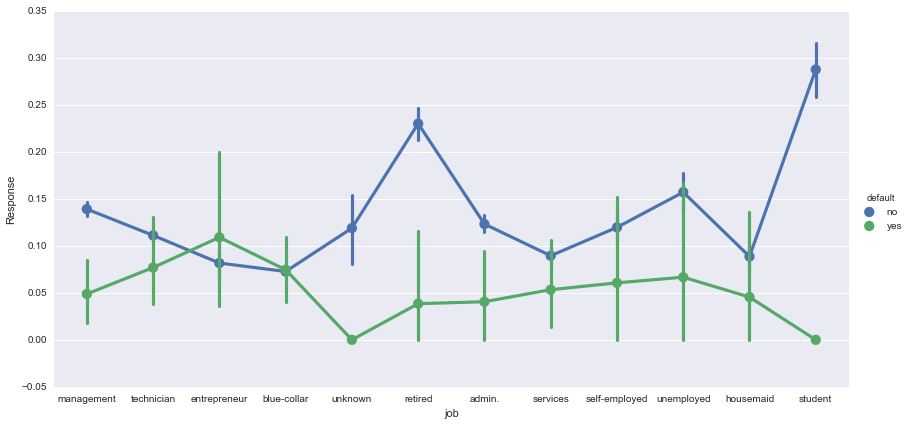

In [73]:
sns.factorplot(x='job',y='Response',hue="default",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##5. job vs housing

Decision:
no_housing*retired

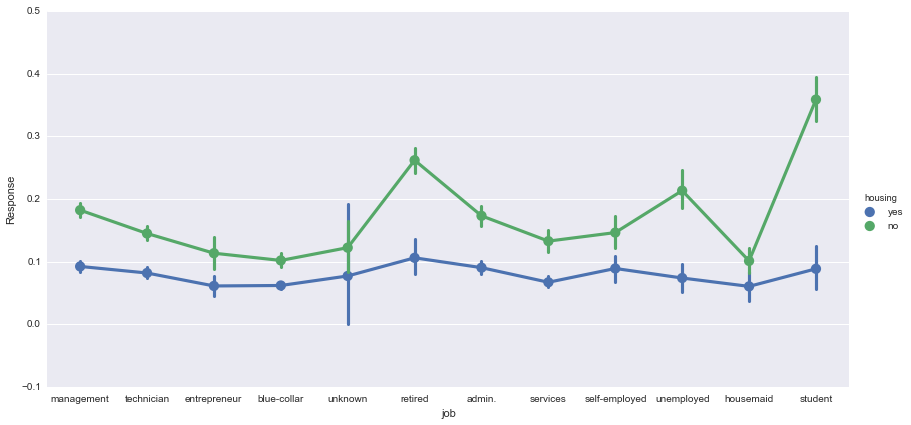

In [74]:
sns.factorplot(x='job',y='Response',hue="housing",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##6. job vs. loan

Decision: 
no ttt

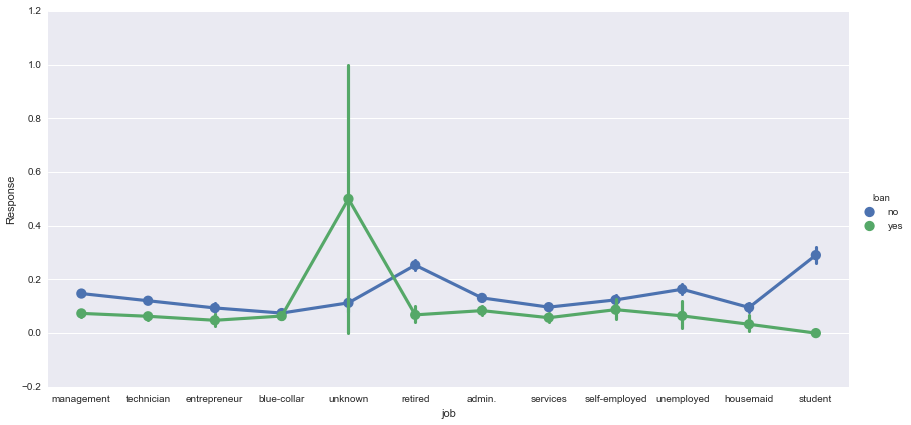

In [75]:
sns.factorplot(x='job',y='Response',hue="loan",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##7. job vs. contact

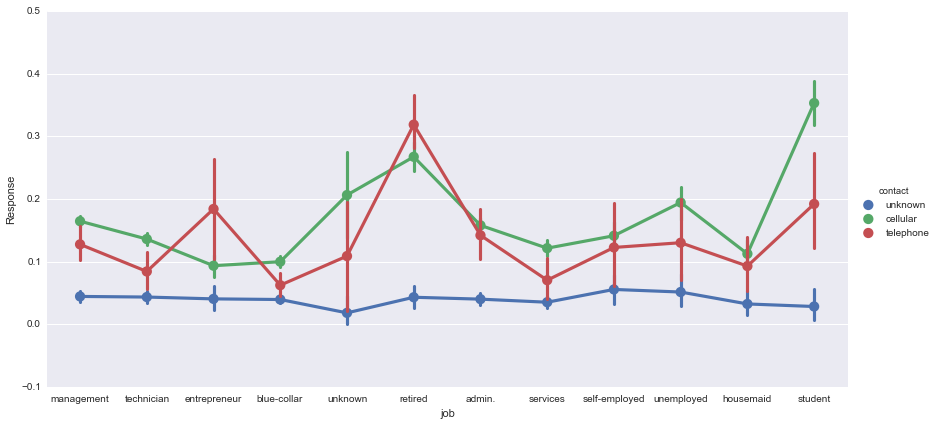

In [76]:
sns.factorplot(x='job',y='Response',hue="loan",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##8. job vs. age_group

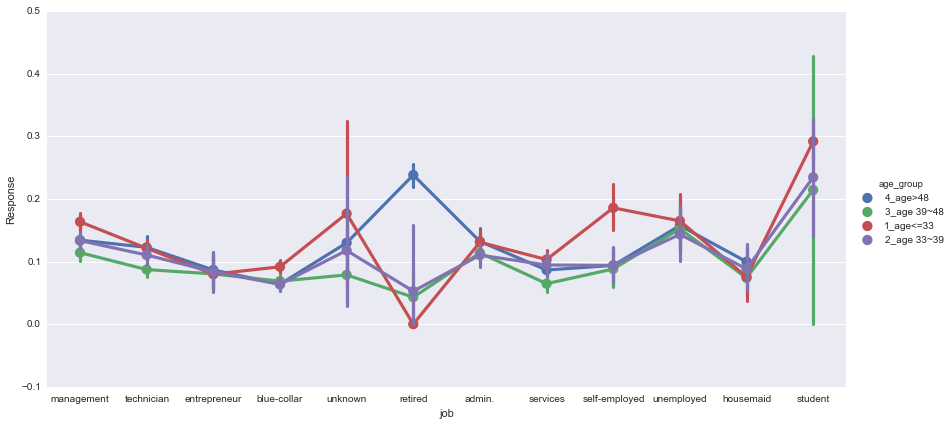

In [78]:
sns.factorplot(x='job',y='Response',hue="age_group",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##9. job vs. balance_group

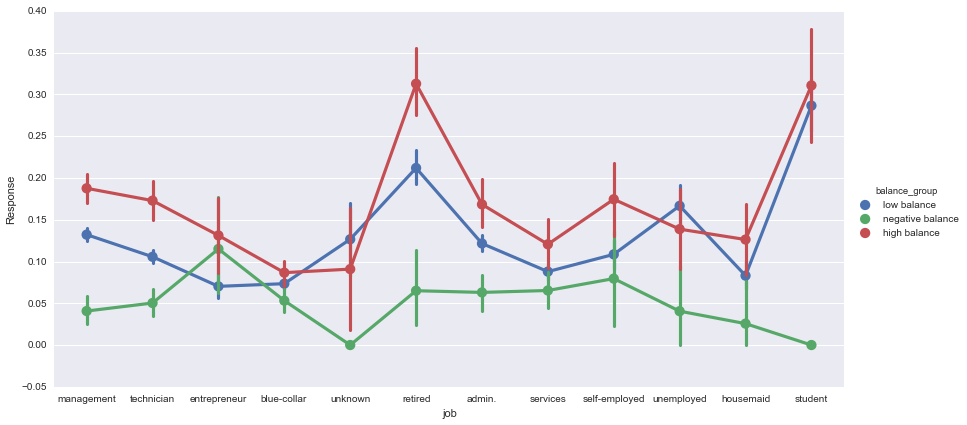

In [79]:
sns.factorplot(x='job',y='Response',hue="balance_group",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##10. job vs. day_group

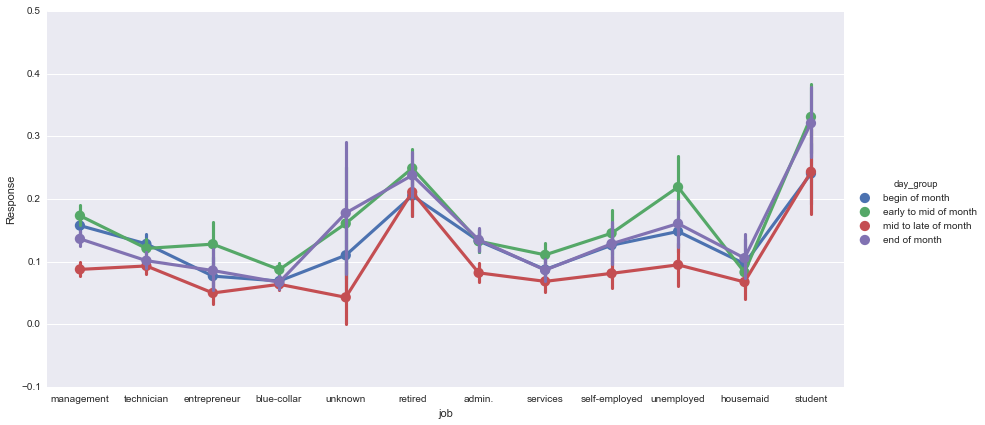

In [80]:
sns.factorplot(x='job',y='Response',hue="day_group",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

## 10. job vs. campaign_group

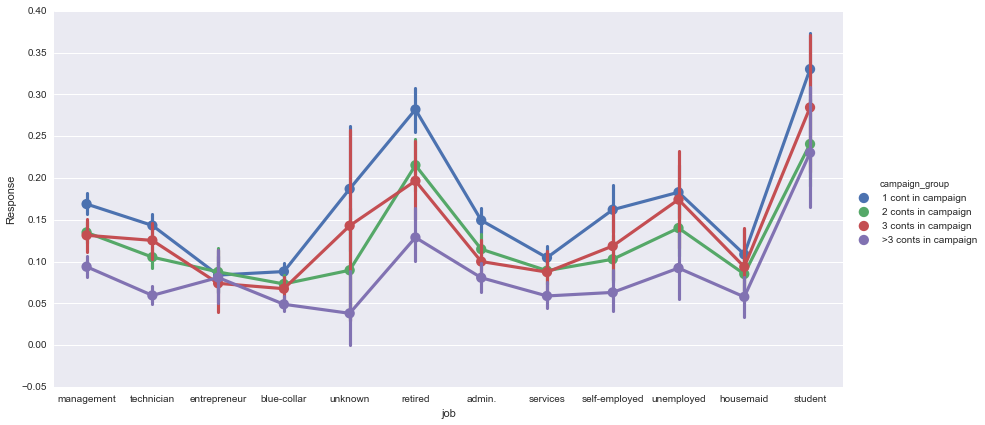

In [81]:
sns.factorplot(x='job',y='Response',hue="campaign_group",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##11. job vs. pdays_group

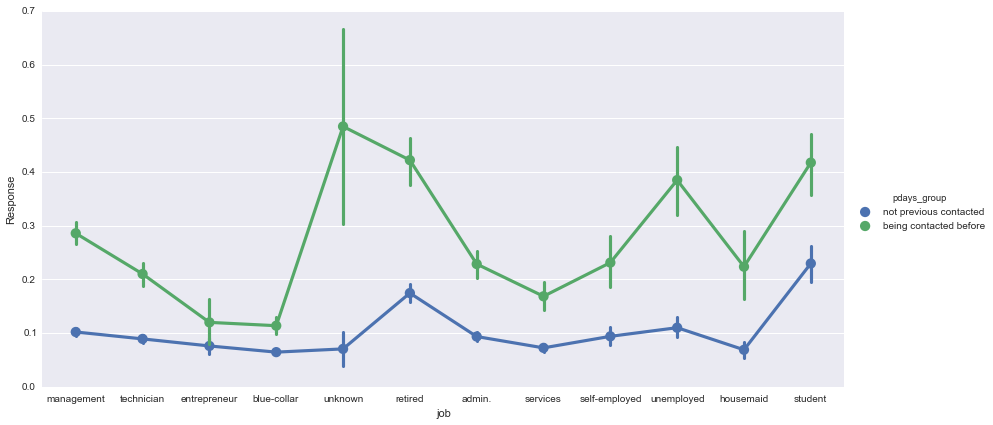

In [82]:
sns.factorplot(x='job',y='Response',hue="pdays_group",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##12. marital vs. education

Decision: divorced*education

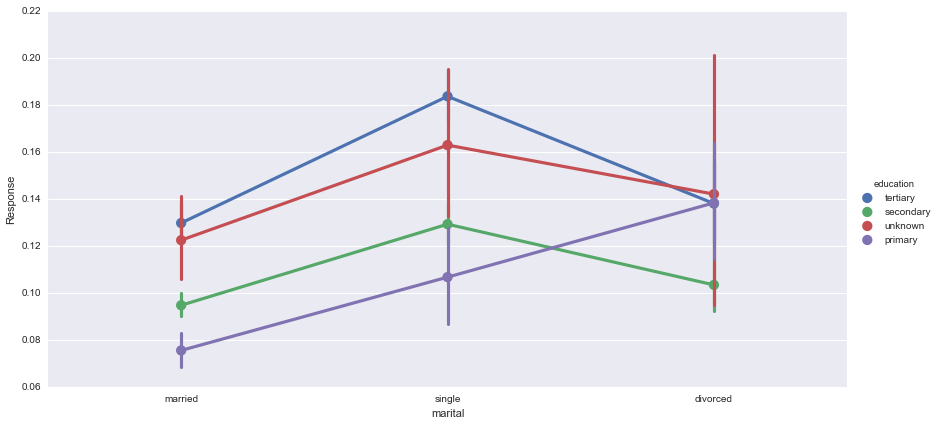

In [83]:
sns.factorplot(x='marital',y='Response',hue="education",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##13. marital vs. default

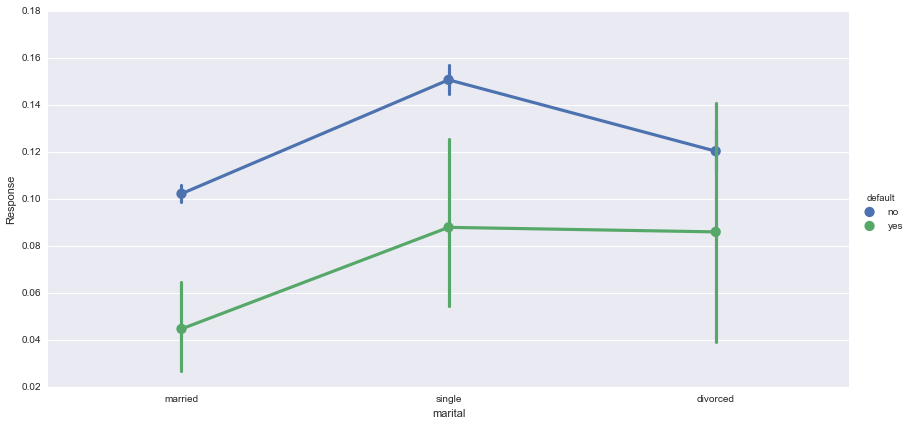

In [84]:
sns.factorplot(x='marital',y='Response',hue="default",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

## 14. marital vs. housing

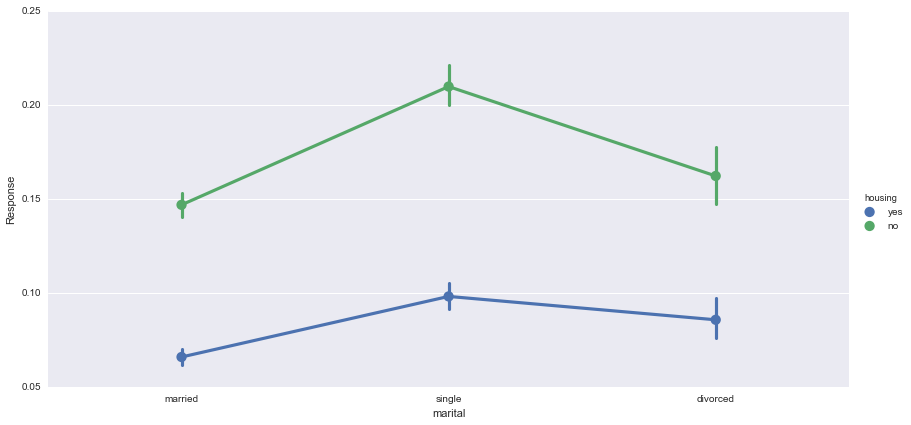

In [85]:
sns.factorplot(x='marital',y='Response',hue="housing",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

## 15. marital vs. loan 

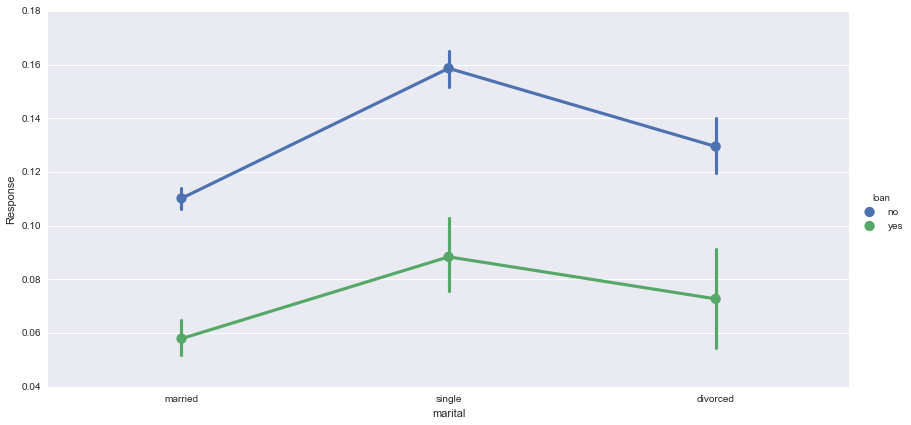

In [86]:
sns.factorplot(x='marital',y='Response',hue="loan",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

## 16. marital vs. contact



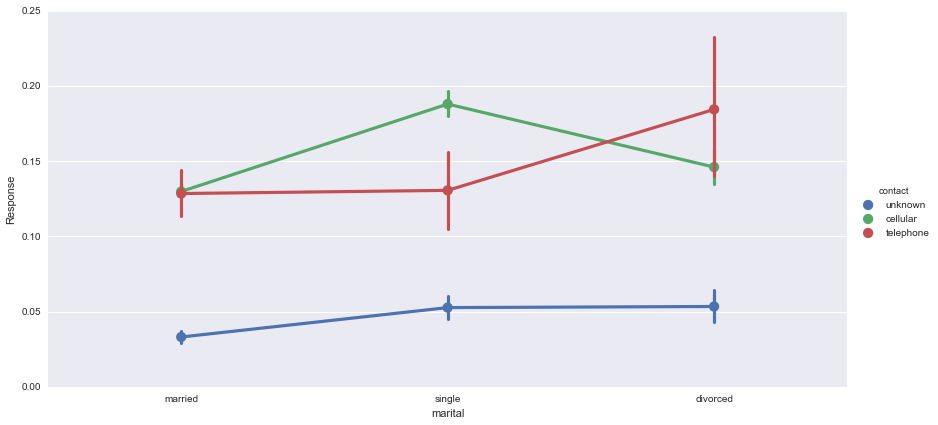

In [87]:
sns.factorplot(x='marital',y='Response',hue="contact",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##17. marital vs. age_group

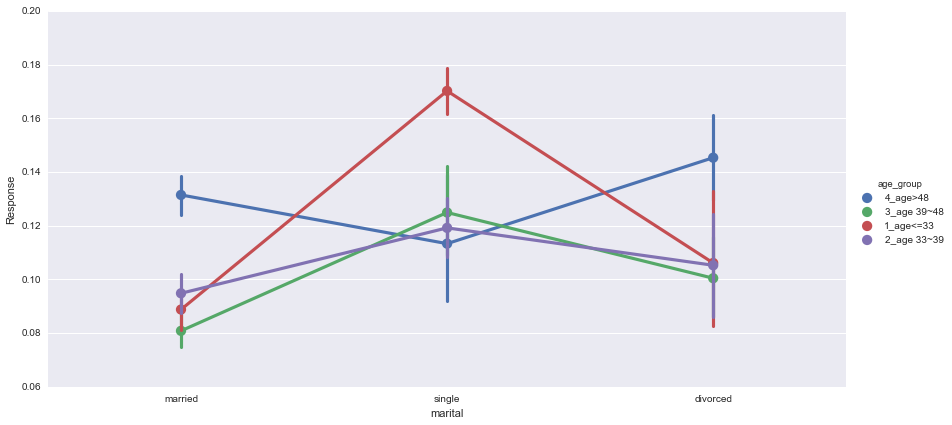

In [88]:
sns.factorplot(x='marital',y='Response',hue="age_group",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##18. marital vs. balance_group

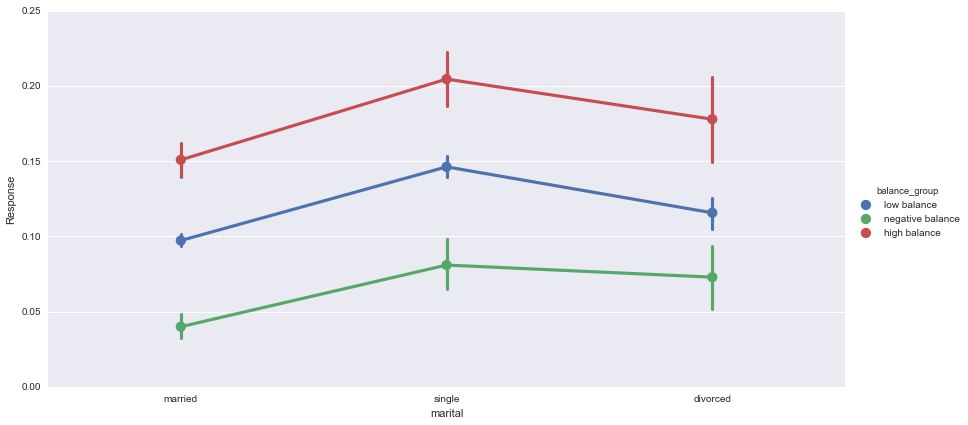

In [89]:
sns.factorplot(x='marital',y='Response',hue="balance_group",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##19. marital vs. day_group

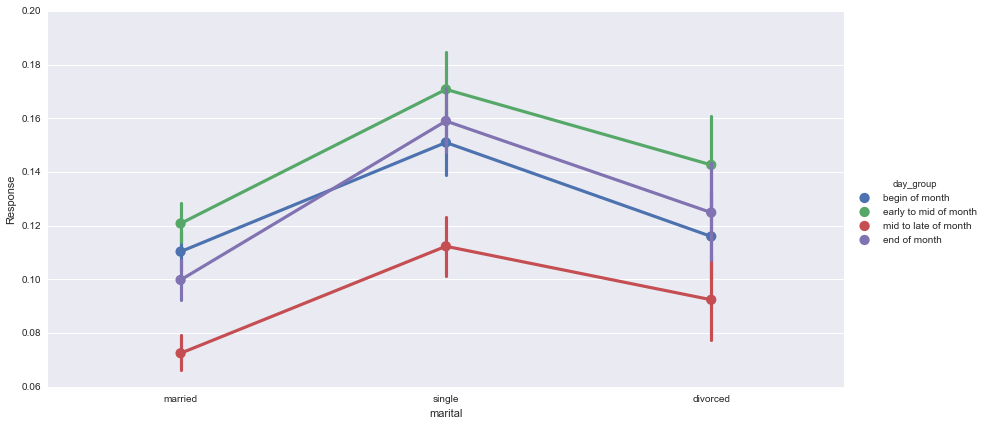

In [90]:
sns.factorplot(x='marital',y='Response',hue="day_group",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##20. marital vs. campaign group

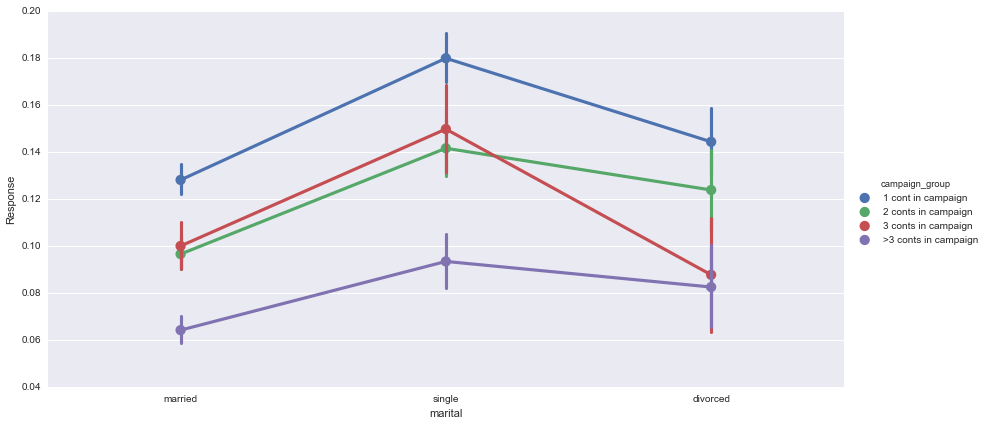

In [91]:
sns.factorplot(x='marital',y='Response',hue="campaign_group",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##21. marital vs. days_group

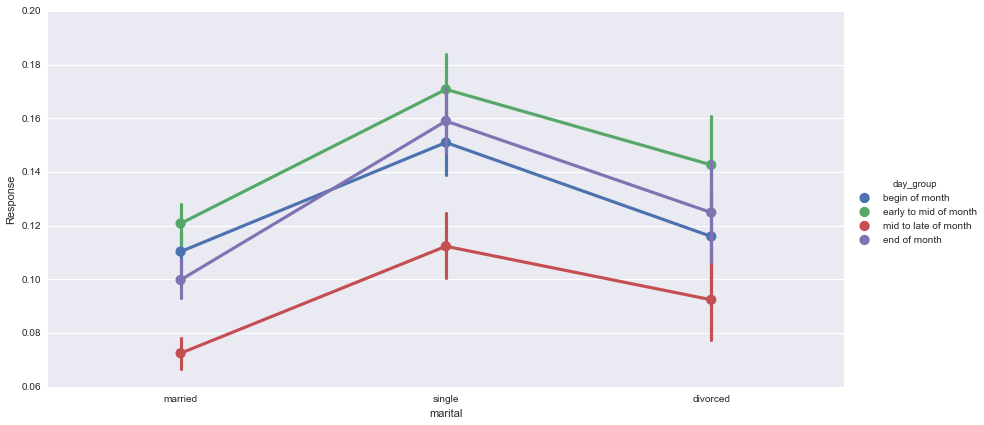

In [92]:
sns.factorplot(x='marital',y='Response',hue="day_group",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

## 22. marital vs. campaign

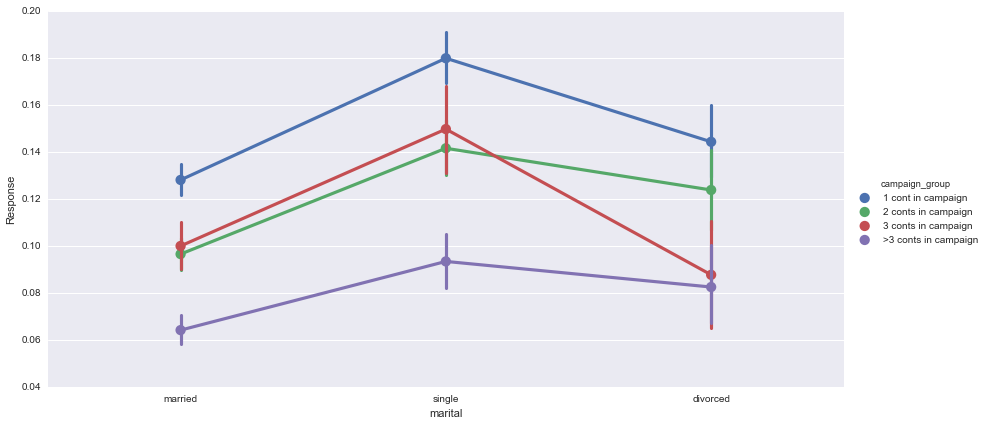

In [93]:
sns.factorplot(x='marital',y='Response',hue="campaign_group",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##23. marital vs. pdays_group

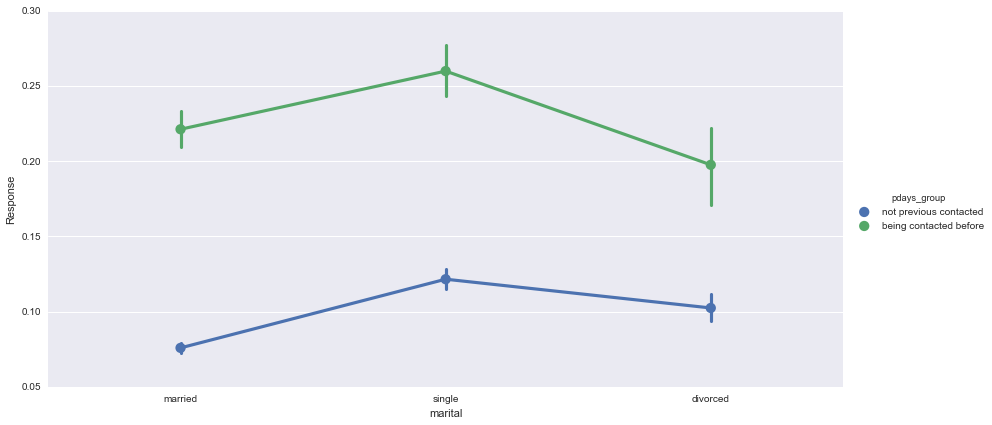

In [94]:
sns.factorplot(x='marital',y='Response',hue="pdays_group",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##24. education vs. default 

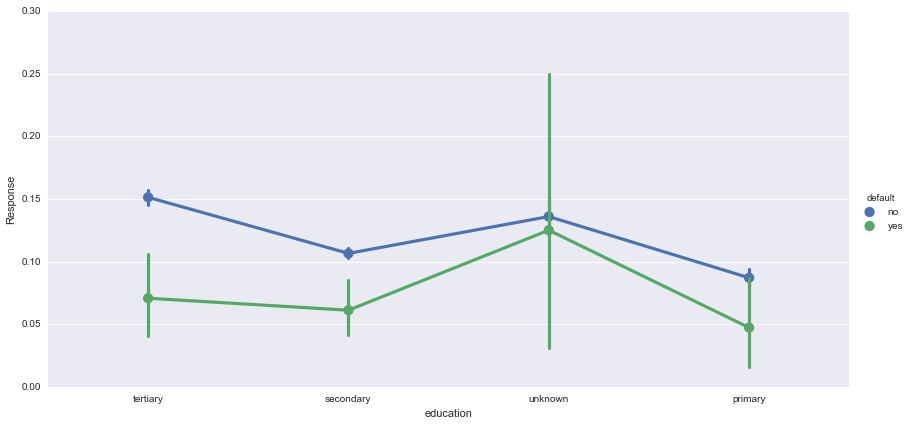

In [95]:
sns.factorplot(x='education',y='Response',hue="default",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##25. education vs. housing

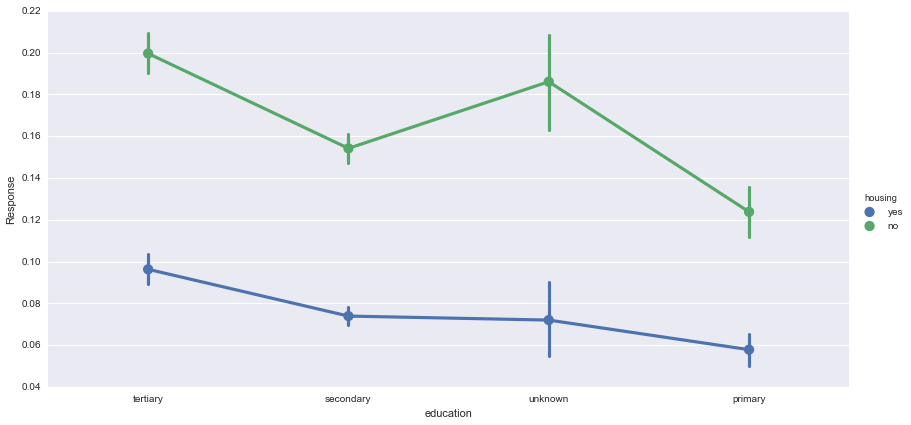

In [99]:
sns.factorplot(x='education',y='Response',hue="housing",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##26. education vs. loan

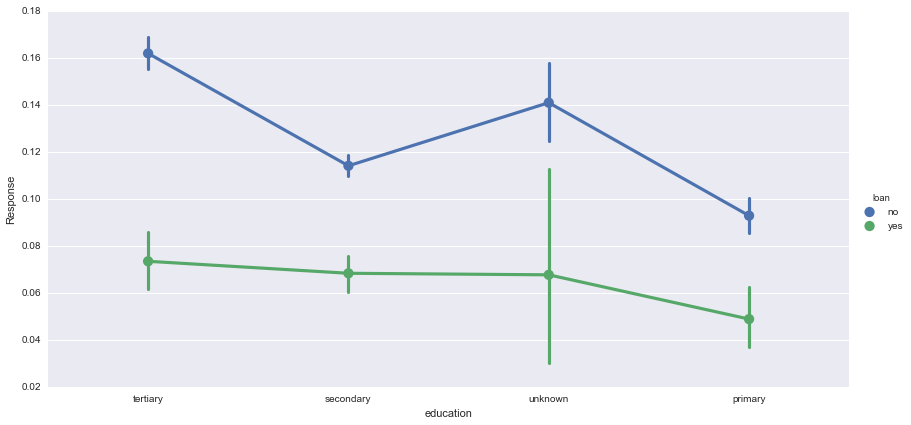

In [100]:
sns.factorplot(x='education',y='Response',hue="loan",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##27. education vs. contact

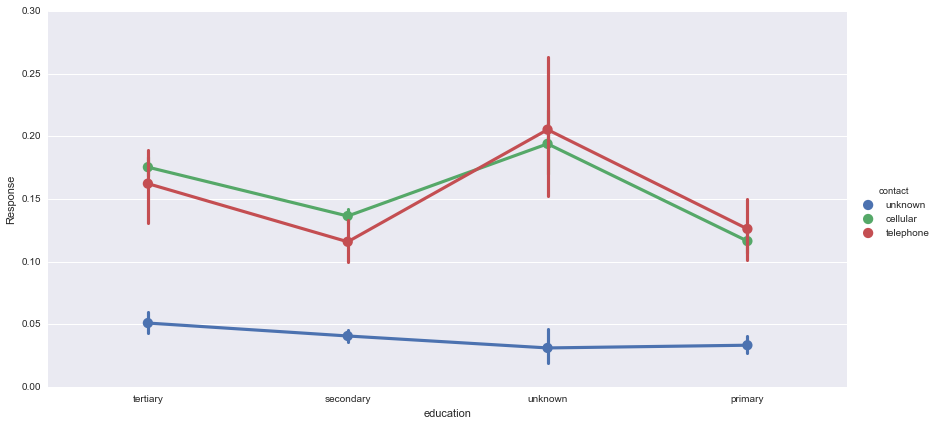

In [101]:
sns.factorplot(x='education',y='Response',hue="contact",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##28. education vs. age_group

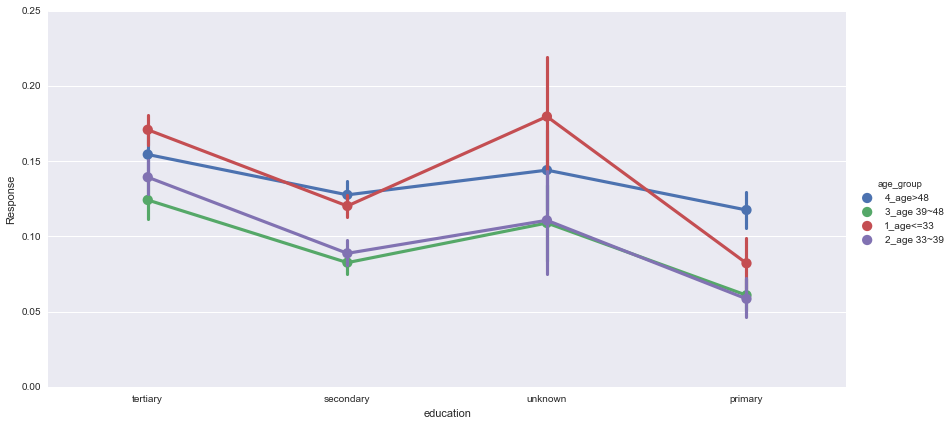

In [102]:
sns.factorplot(x='education',y='Response',hue="age_group",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

## 29. education vs. balance_group

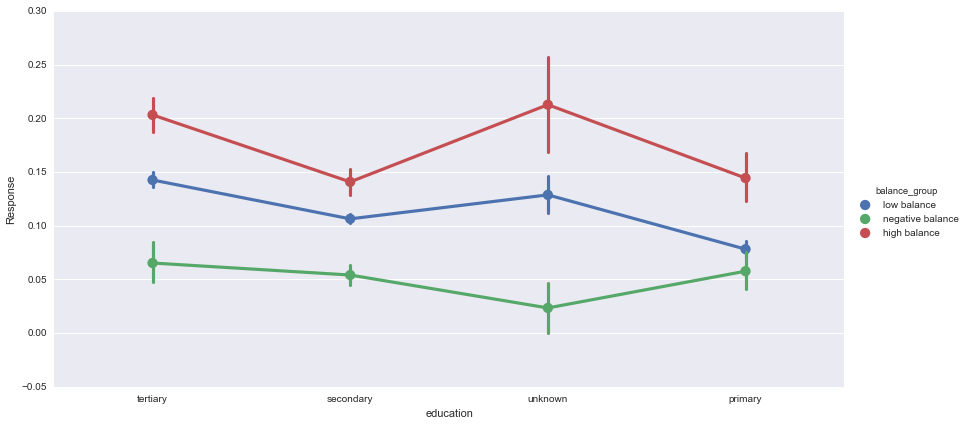

In [103]:
sns.factorplot(x='education',y='Response',hue="balance_group",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

## 30. education vs. day_group

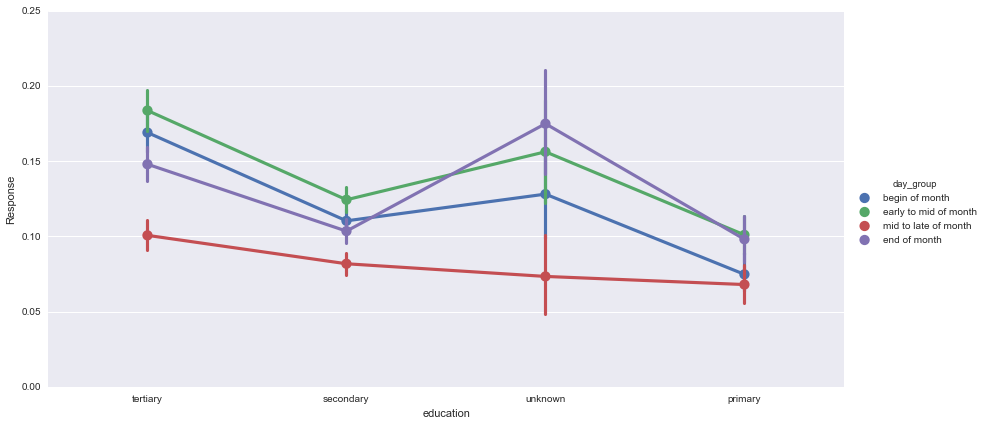

In [104]:
sns.factorplot(x='education',y='Response',hue="day_group",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

## 31. education vs. campaign_group

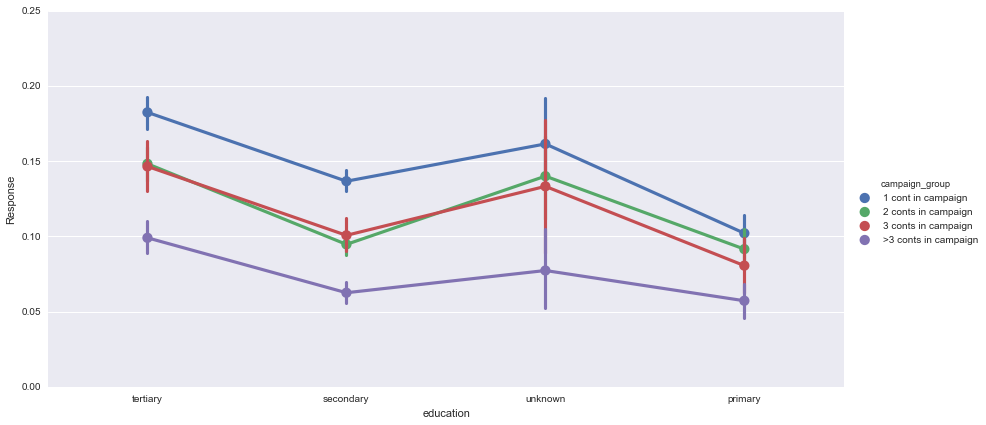

In [105]:
sns.factorplot(x='education',y='Response',hue="campaign_group",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##32. education vs. pdays_group

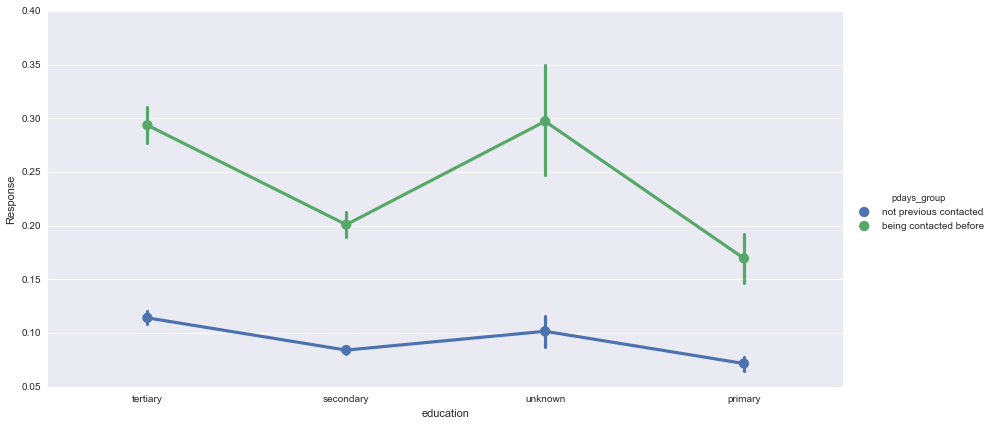

In [106]:
sns.factorplot(x='education',y='Response',hue="pdays_group",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##33. default vs. housing

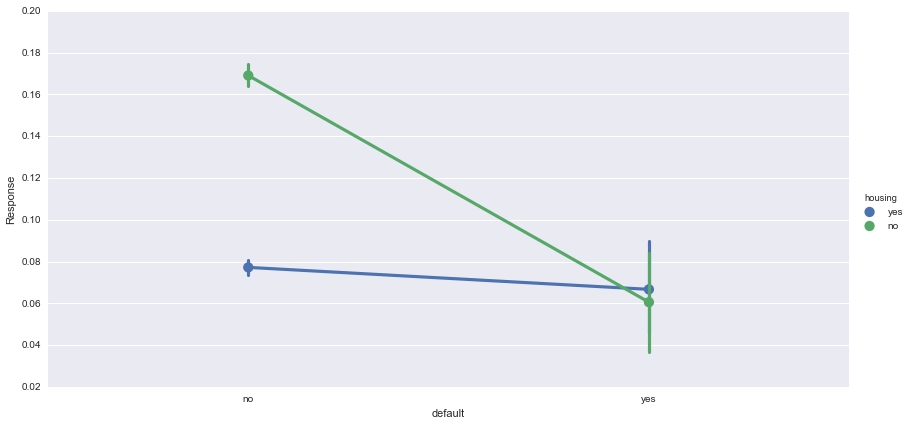

In [107]:
sns.factorplot(x='default',y='Response',hue="housing",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##34. default vs. loan

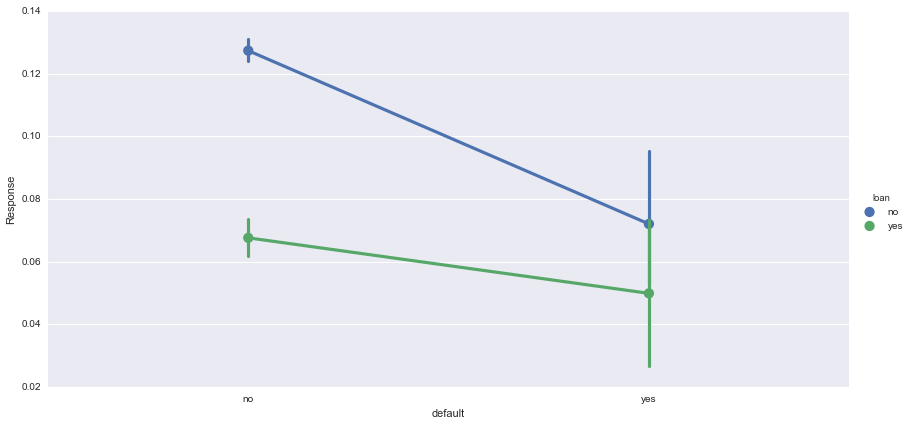

In [108]:
sns.factorplot(x='default',y='Response',hue="loan",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##35. default vs. contact

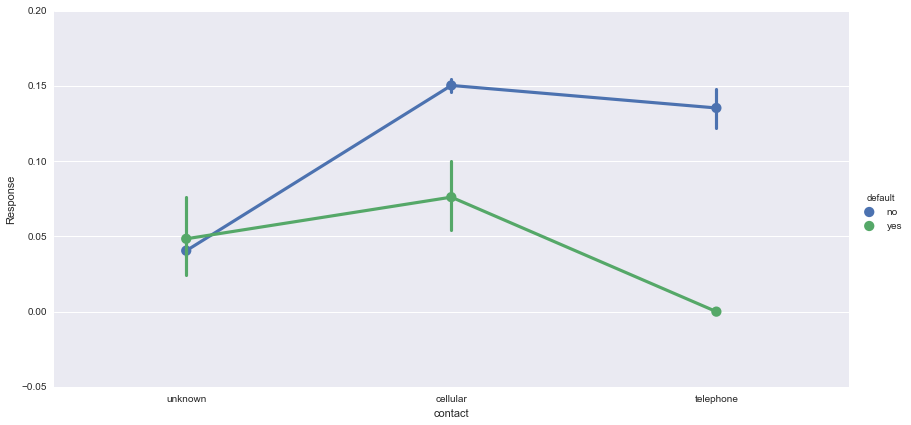

In [109]:
sns.factorplot(x='contact',y='Response',hue="default",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

## 36. default vs. age_group

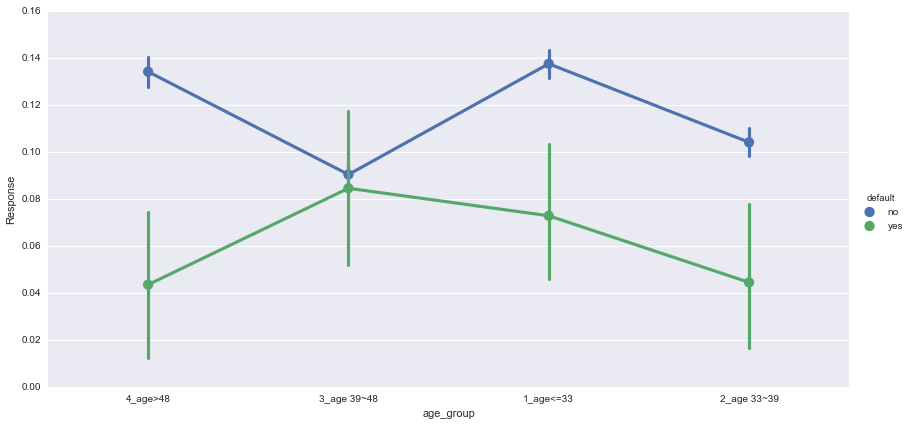

In [111]:
sns.factorplot(x='age_group',y='Response',hue="default",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##37. default vs. balance_group

Decision: no_default&high_balance

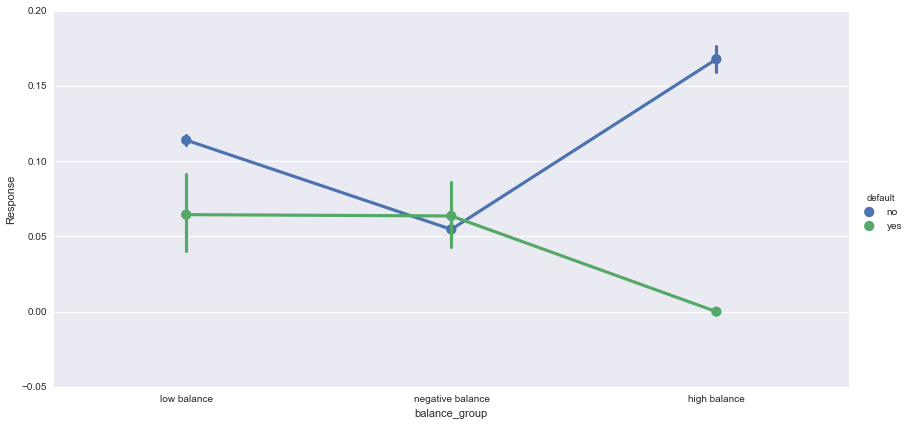

In [112]:
sns.factorplot(x='balance_group',y='Response',hue="default",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##38. default vs. day_group

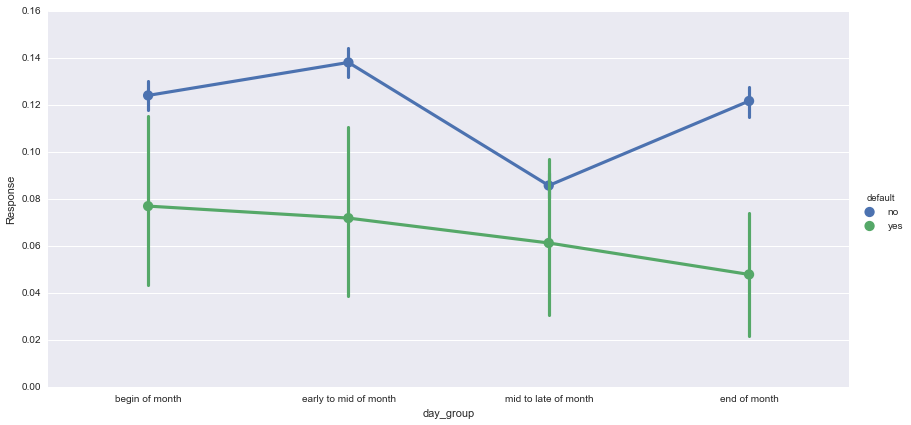

In [113]:
sns.factorplot(x='day_group',y='Response',hue="default",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##39. default vs. campaign_group

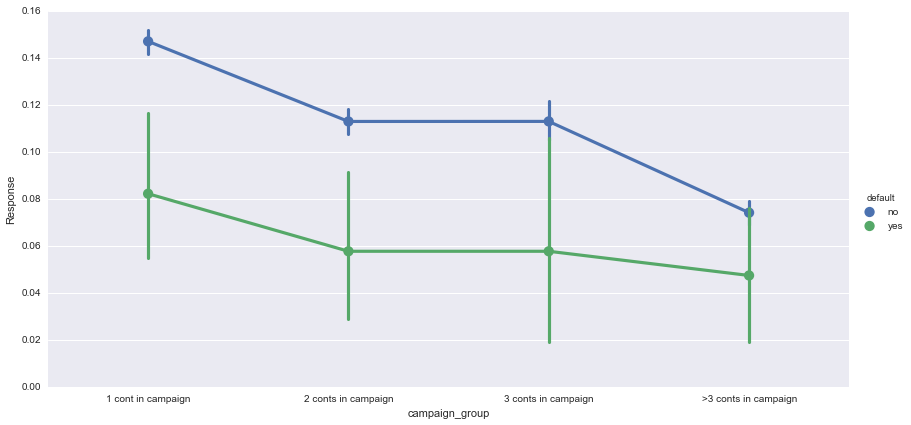

In [114]:
sns.factorplot(x='campaign_group',y='Response',hue="default",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##40. default vs. pdays_group

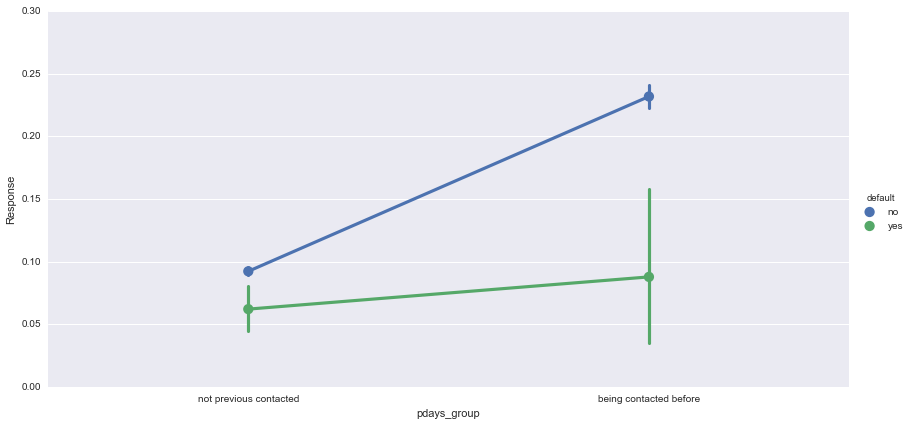

In [115]:
sns.factorplot(x='pdays_group',y='Response',hue="default",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##41. housing vs. loan 

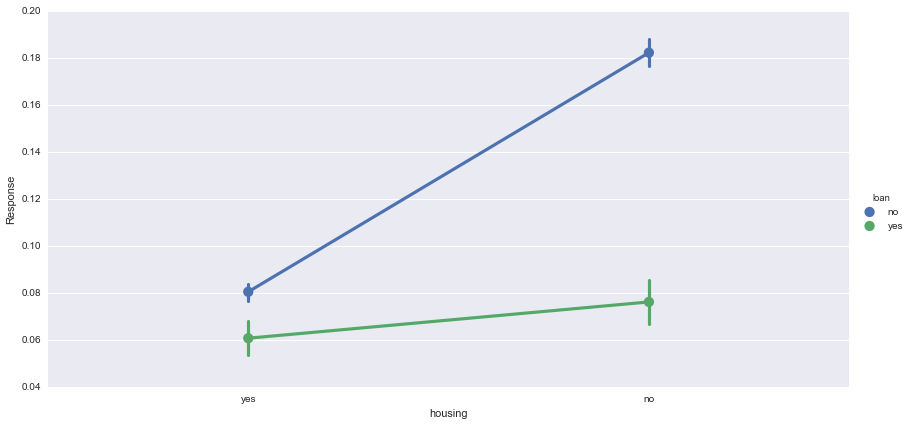

In [116]:
sns.factorplot(x='housing',y='Response',hue="loan",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##42. housing vs. contact 

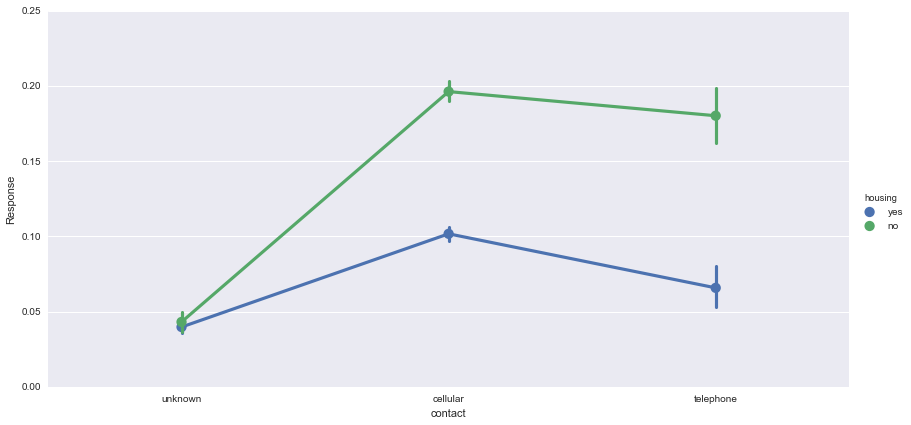

In [117]:
sns.factorplot(x='contact',y='Response',hue="housing",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##43. housing vs. age_group

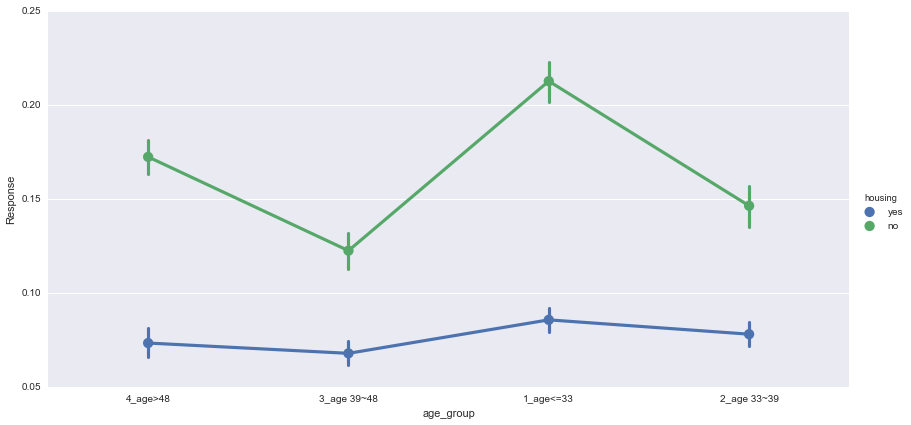

In [118]:
sns.factorplot(x='age_group',y='Response',hue="housing",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##44. housing vs. balance_group

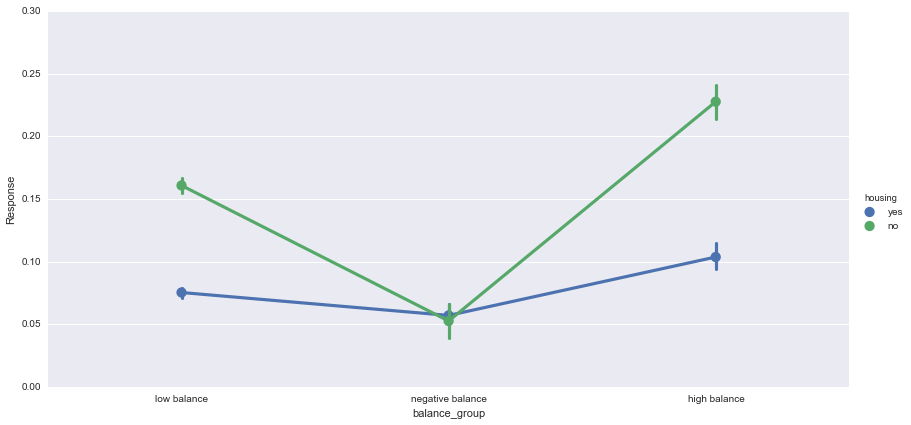

In [119]:
sns.factorplot(x='balance_group',y='Response',hue="housing",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##45. housing vs. day_group

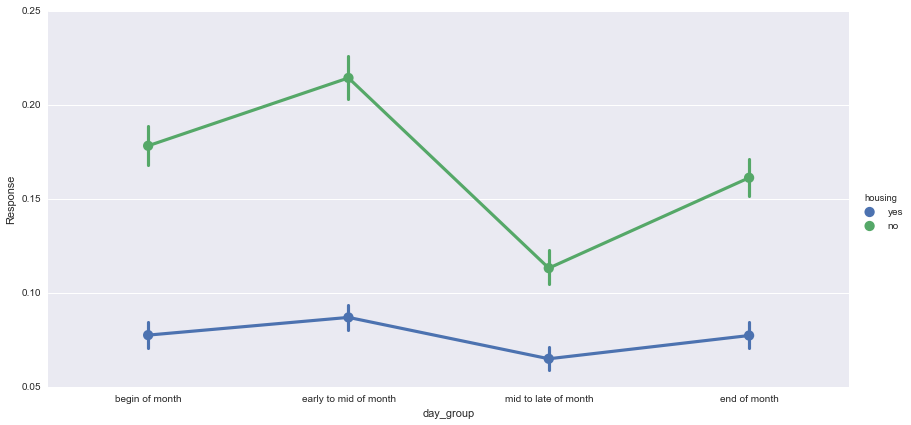

In [120]:
sns.factorplot(x='day_group',y='Response',hue="housing",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##46. housing vs. campaign_group

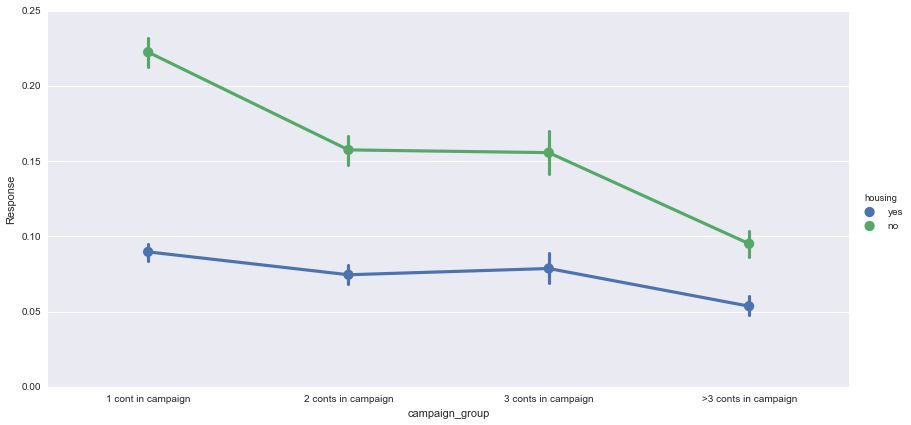

In [121]:
sns.factorplot(x='campaign_group',y='Response',hue="housing",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##47. housing vs. pdays_groups

Decision: Housing&pdays_group

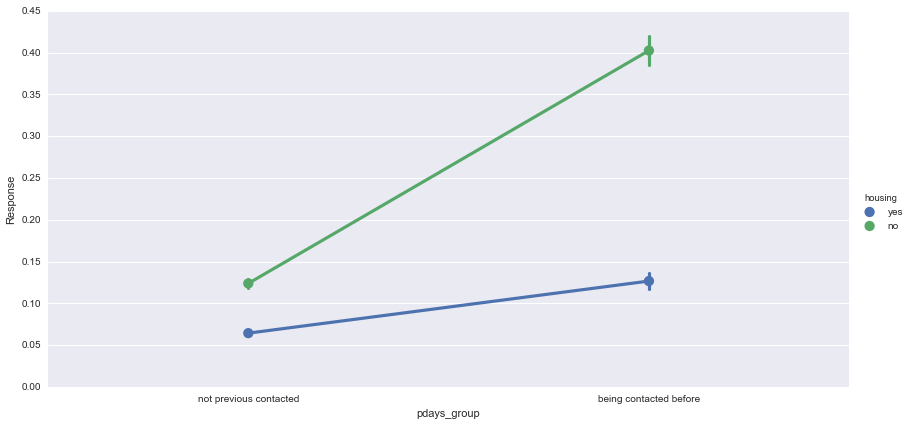

In [122]:
sns.factorplot(x='pdays_group',y='Response',hue="housing",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##48. loan vs. contact

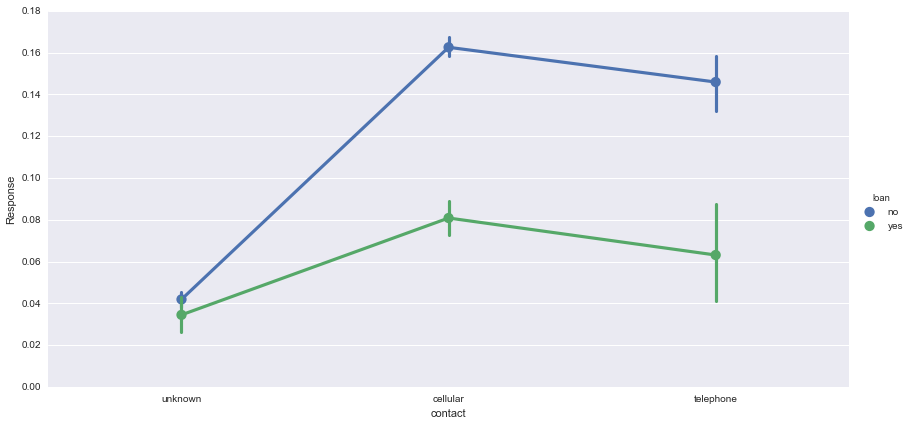

In [123]:
sns.factorplot(x='contact',y='Response',hue="loan",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##49. loan vs. age_group

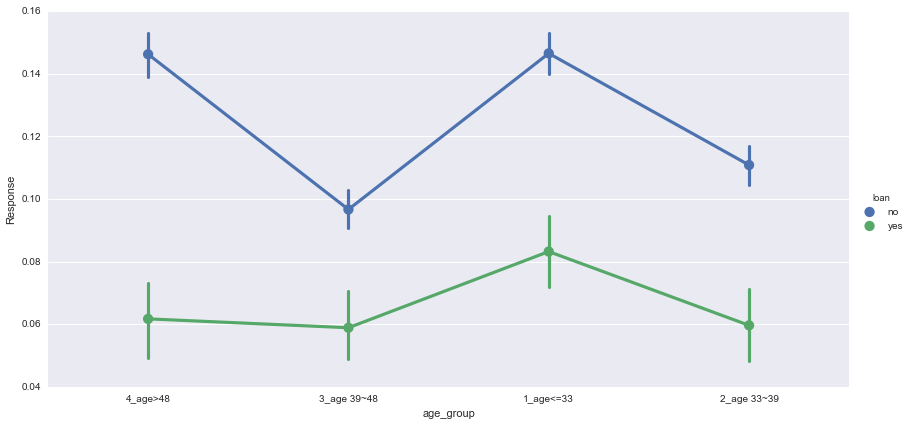

In [125]:
sns.factorplot(x='age_group',y='Response',hue="loan",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##50. loan vs. balance_group

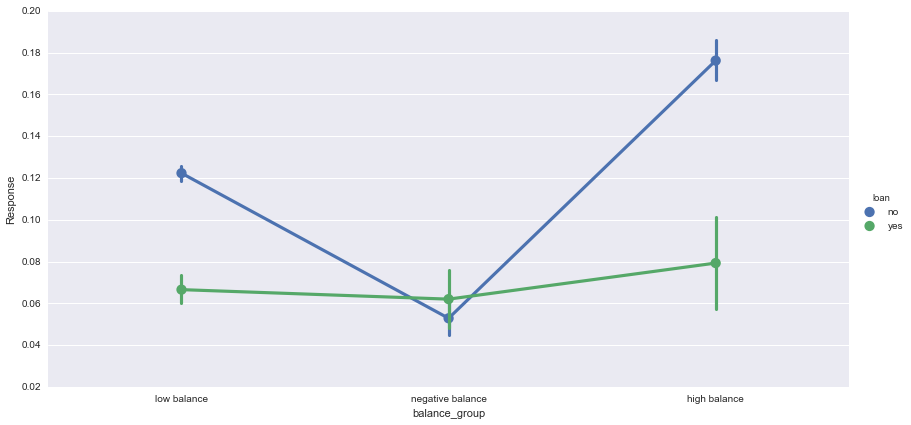

In [126]:
sns.factorplot(x='balance_group',y='Response',hue="loan",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##51. loan vs. day_group

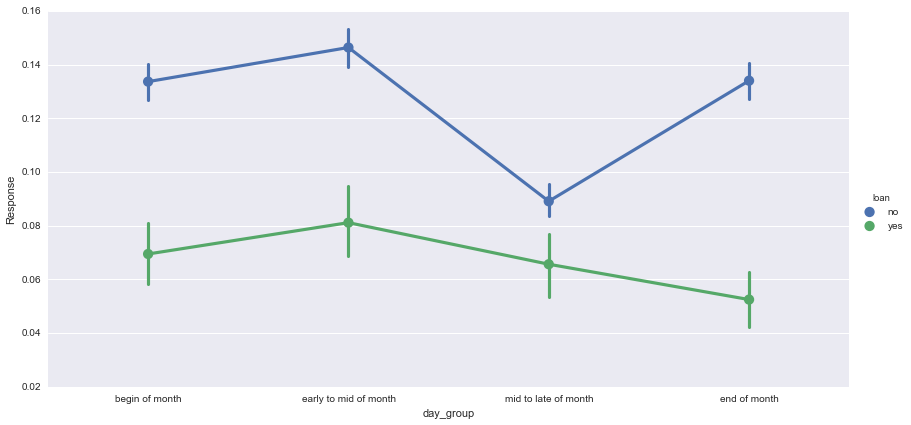

In [127]:
sns.factorplot(x='day_group',y='Response',hue="loan",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##52. loan vs. campaign_group

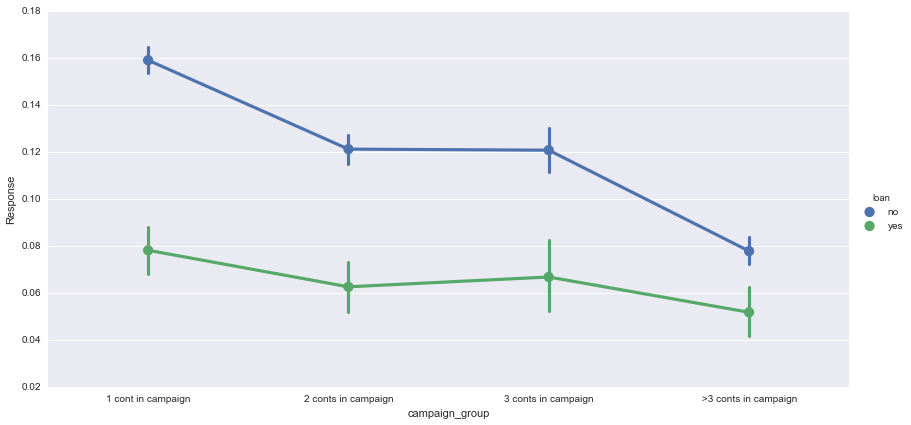

In [128]:
sns.factorplot(x='campaign_group',y='Response',hue="loan",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##53. loan vs. pdays_group

Decision: loan&pdays_group

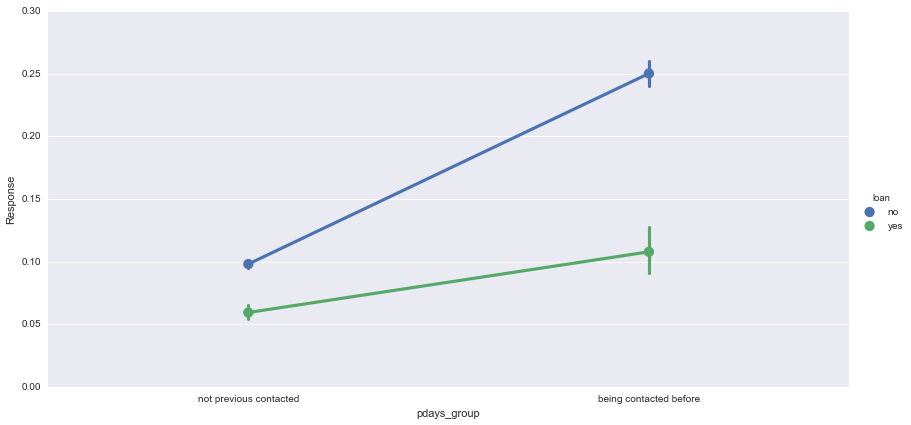

In [129]:
sns.factorplot(x='pdays_group',y='Response',hue="loan",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##54. contact vs. age_group

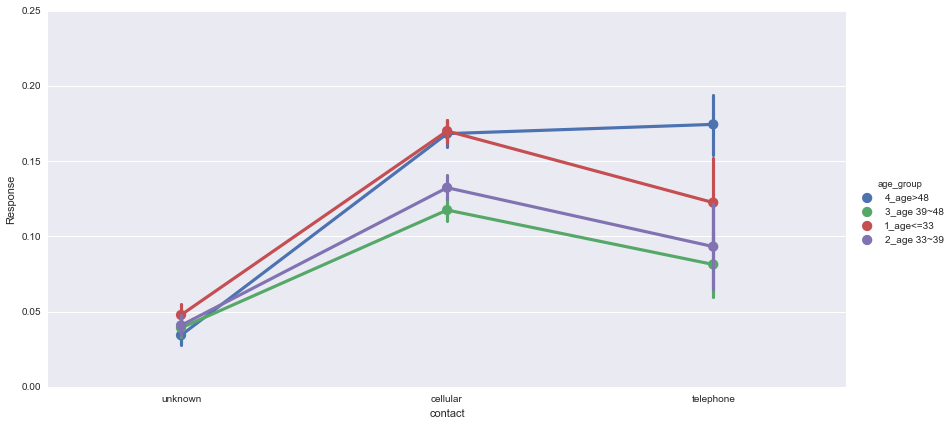

In [130]:
sns.factorplot(x='contact',y='Response',hue="age_group",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##55. contact vs. balance_group

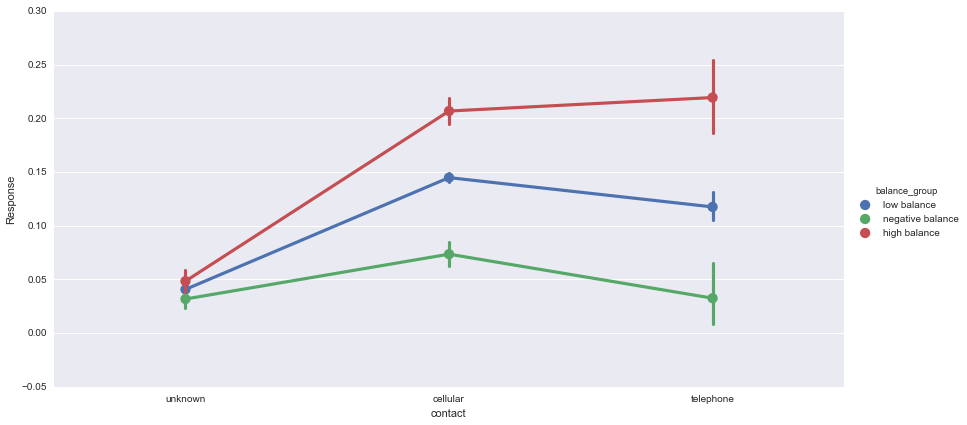

In [131]:
sns.factorplot(x='contact',y='Response',hue="balance_group",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##56. contact vs. day_group

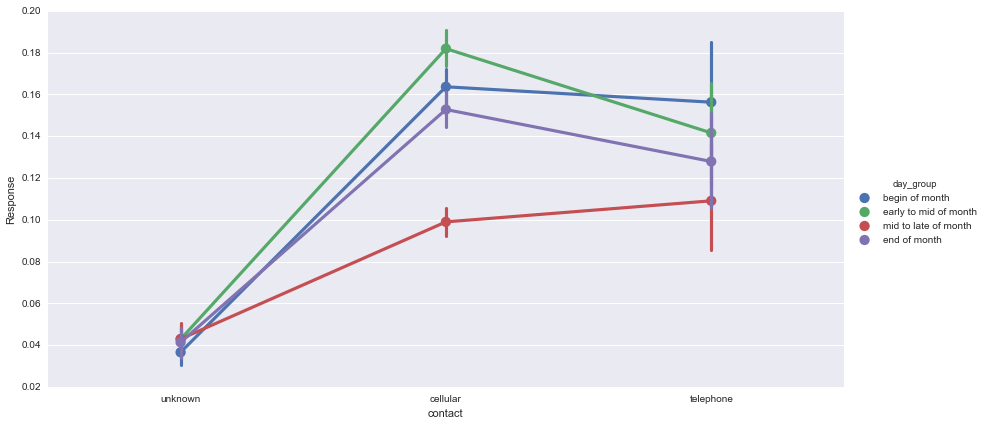

In [132]:
sns.factorplot(x='contact',y='Response',hue="day_group",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

## 57. contact vs. campaign_group

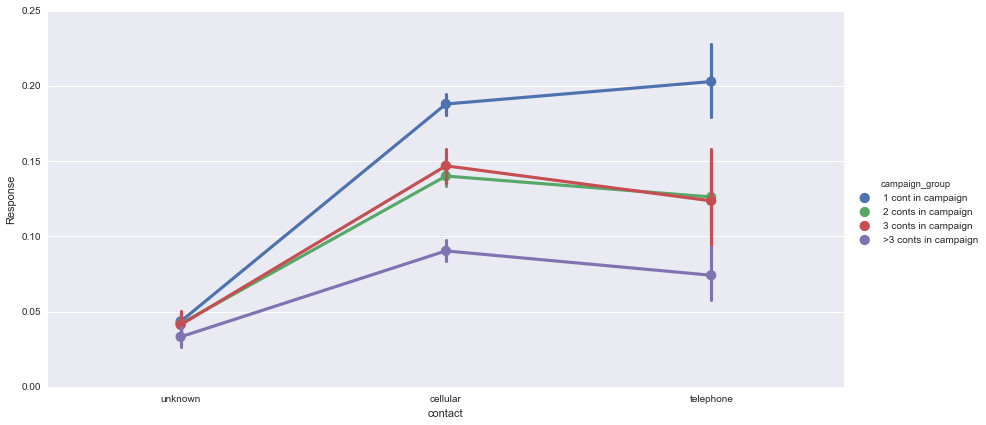

In [133]:
sns.factorplot(x='contact',y='Response',hue="campaign_group",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##58. contact vs. pdays_group

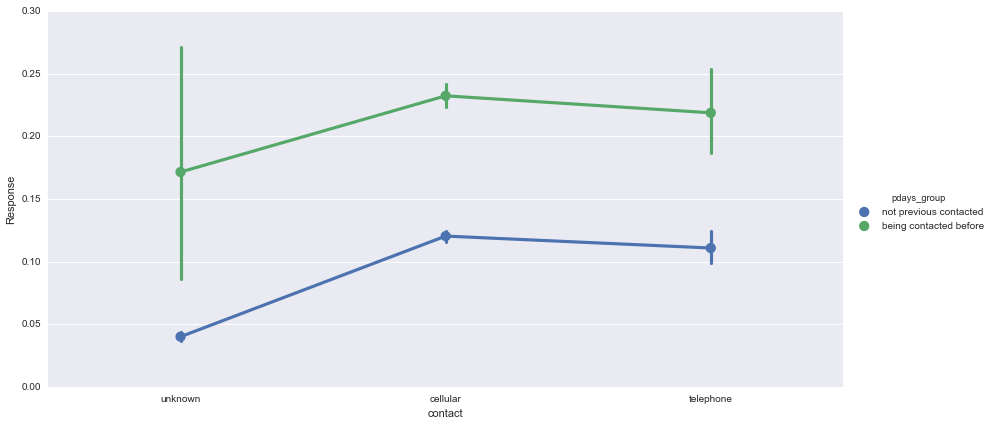

In [134]:
sns.factorplot(x='contact',y='Response',hue="pdays_group",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##59. age_group vs. balance_group

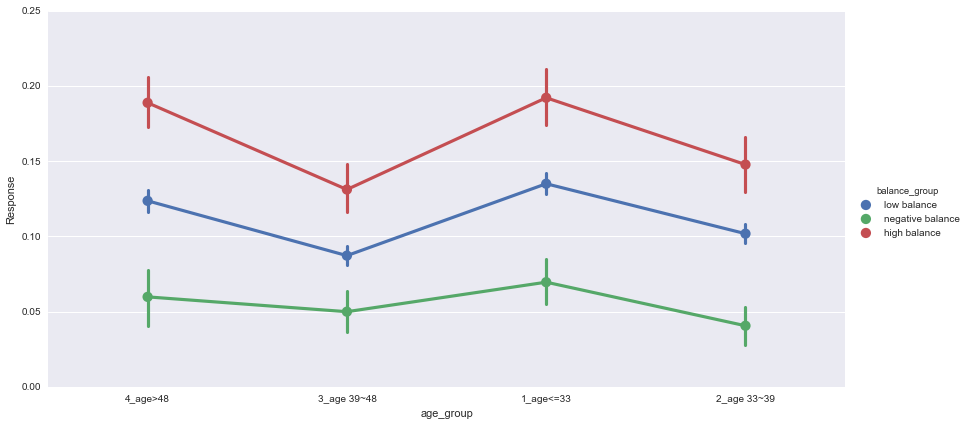

In [135]:
sns.factorplot(x='age_group',y='Response',hue="balance_group",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##60. age_group vs. day_group

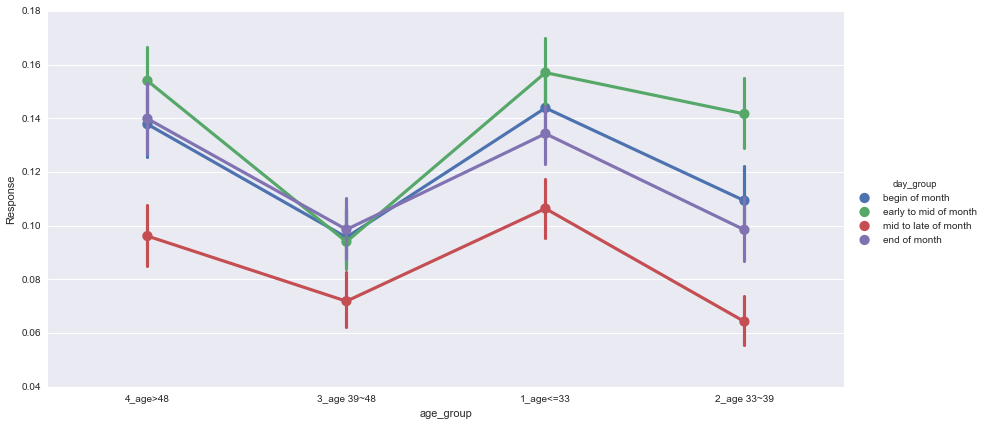

In [136]:
sns.factorplot(x='age_group',y='Response',hue="day_group",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##61. age_group vs. campaign_group

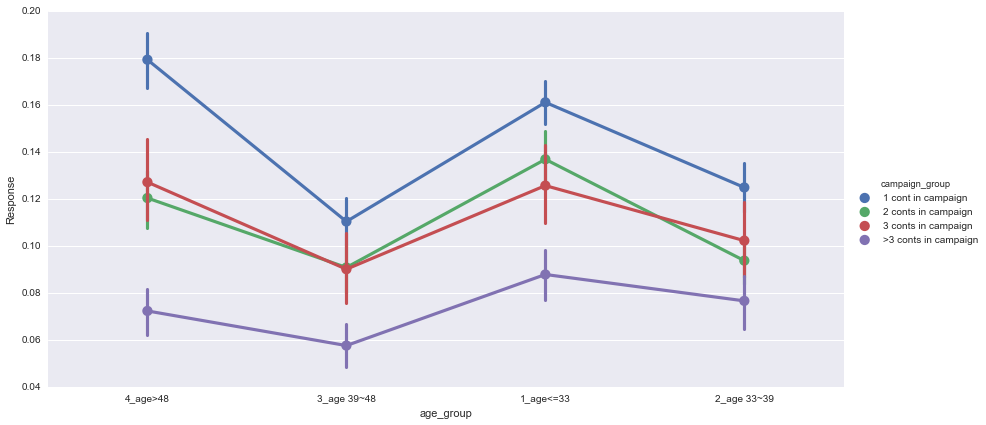

In [137]:
sns.factorplot(x='age_group',y='Response',hue="campaign_group",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##62. age_group vs. pdays_group

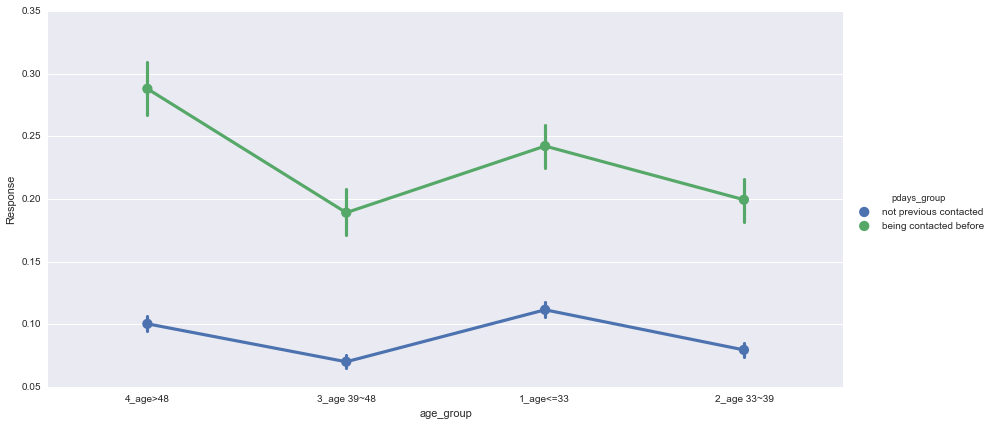

In [138]:
sns.factorplot(x='age_group',y='Response',hue="pdays_group",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##63. balance_group vs. day_group

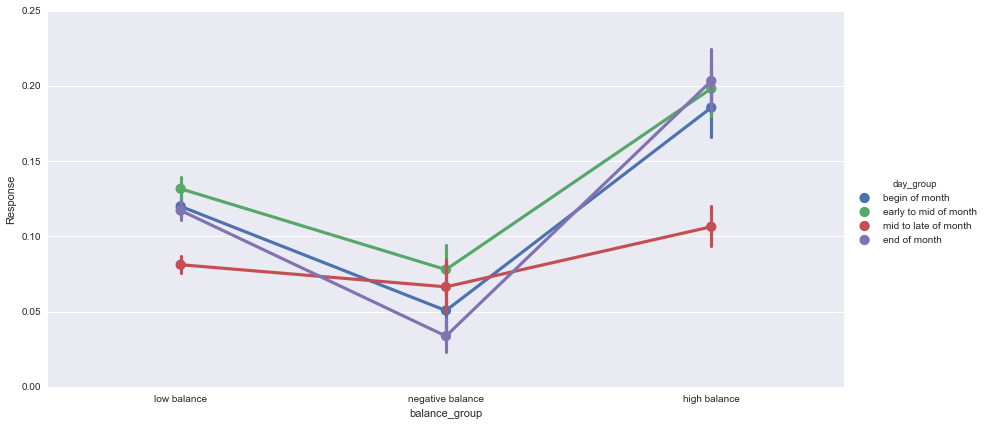

In [139]:
sns.factorplot(x='balance_group',y='Response',hue="day_group",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##64. balance_group vs. campaign_group

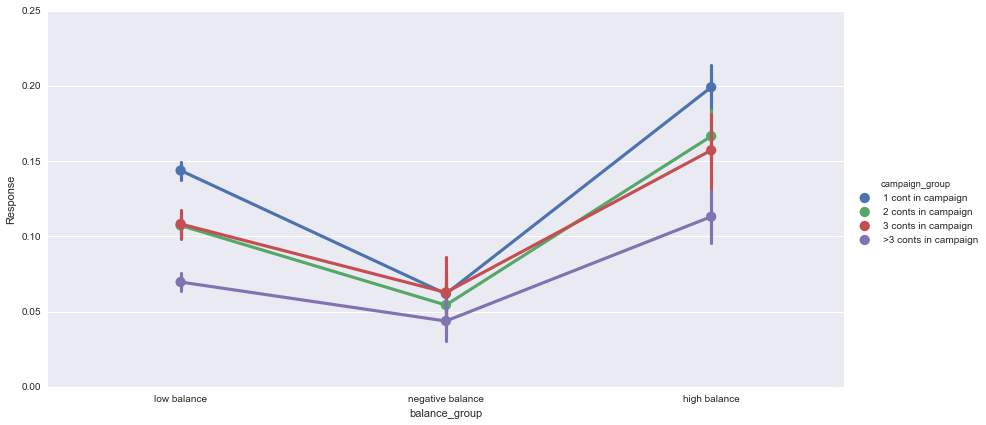

In [140]:
sns.factorplot(x='balance_group',y='Response',hue="campaign_group",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##65. balance_group vs. pdays_groups 

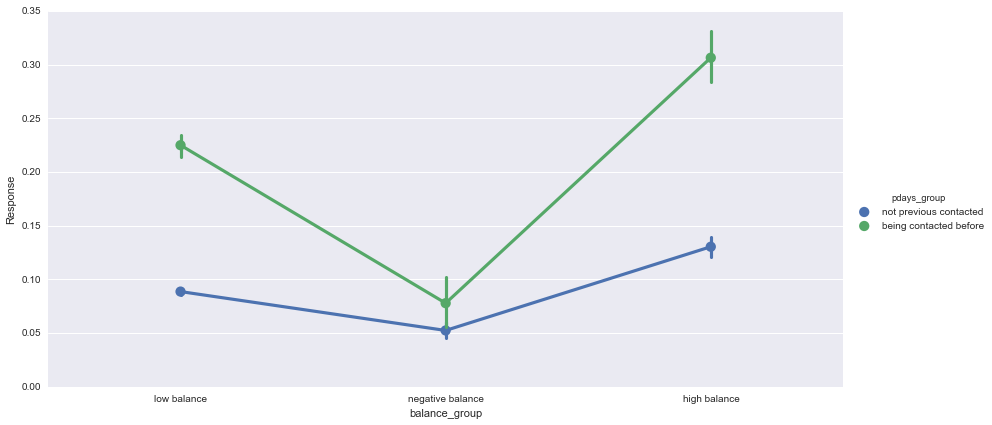

In [142]:
sns.factorplot(x='balance_group',y='Response',hue="pdays_group",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##66. day_group vs. campaign_group

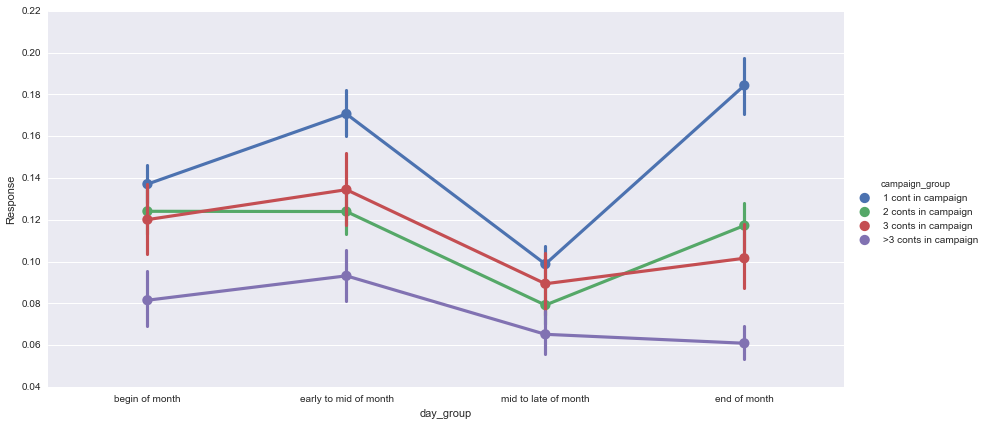

In [143]:
sns.factorplot(x='day_group',y='Response',hue="campaign_group",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##67. day_group vs. pdays_group

Decision: day_group*pdays_group

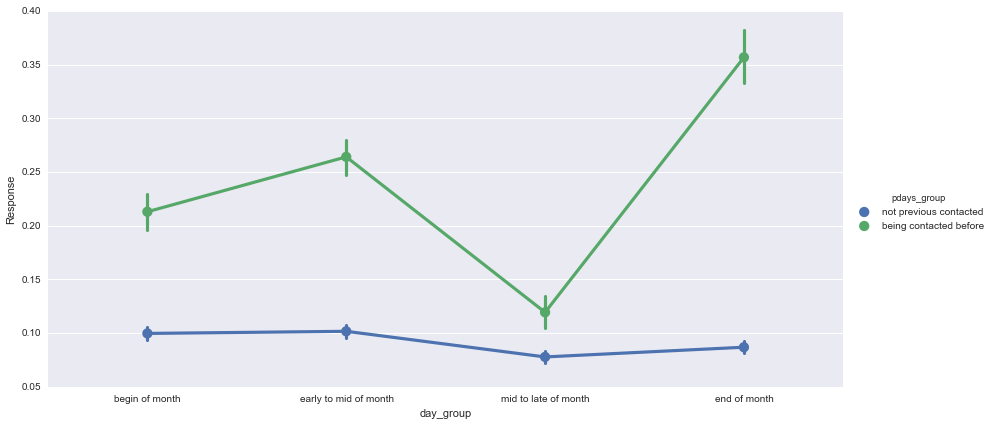

In [144]:
sns.factorplot(x='day_group',y='Response',hue="pdays_group",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

##68. campaign_group vs. pdays_group

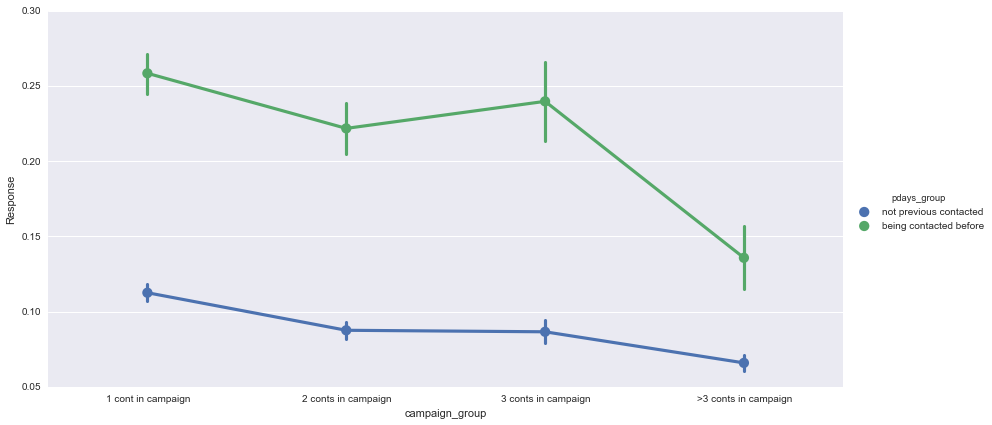

In [145]:
sns.factorplot(x='campaign_group',y='Response',hue="pdays_group",data=bank_telemarket_df,estimator=np.mean,size=6,aspect=2)

In [165]:
bank_telemarket_df['Inter_loan_pdays']=bank_telemarket_df[bank_telemarket_df.pdays_group=='not previous contacted']['pdays_group']+"_"+"loan_"+bank_telemarket_df.loan
bank_telemarket_df.head()
pd.get_dummies(bank_telemarket_df.Inter_loan_pdays).count()

not previous contacted_loan_no     45211
not previous contacted_loan_yes    45211
dtype: int64

###interaction between retired*divorced

In [179]:
bank_telemarket_df['Inter_job_marital']=bank_telemarket_df[(bank_telemarket_df.job=='retired')&
                                                           (bank_telemarket_df.marital=='divorced')]['job']+"_"+"marital_"+bank_telemarket_df.marital
bank_telemarket_df.head()
pd.get_dummies(bank_telemarket_df.Inter_job_marital)

,retired_marital_divorced
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


### interaction between no_default&student

In [180]:
bank_telemarket_df['Inter_job_default']=bank_telemarket_df[(bank_telemarket_df.job=='student')&
                                                           (bank_telemarket_df.default=='no')]['job']+"_"+"default_"+bank_telemarket_df.default
bank_telemarket_df.head()
pd.get_dummies(bank_telemarket_df.Inter_job_default)

,student_default_no
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


### interaction between retried and no housing

In [181]:
bank_telemarket_df['Inter_job_housing']=bank_telemarket_df[(bank_telemarket_df.job=='retired')&
                                                           (bank_telemarket_df.housing=='no')]['job']+"_"+"housing_"+bank_telemarket_df.housing
bank_telemarket_df.head()
pd.get_dummies(bank_telemarket_df.Inter_job_housing)

,retired_housing_no
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


### interaction between student & no loan

In [182]:
bank_telemarket_df['Inter_job_loan']=bank_telemarket_df[(bank_telemarket_df.job=='student')&
                                                           (bank_telemarket_df.loan=='no')]['job']+"_"+"loan_"+bank_telemarket_df.loan
bank_telemarket_df.head()
pd.get_dummies(bank_telemarket_df.Inter_job_loan)

,student_loan_no
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


### interaction between students and pdays<200

In [183]:
def pdays_group(row):
#    if row['pdays'] == -1:
#        return 'no_previous_contact'
#    else:
#        return 'contacted_before'
    if row['pdays'] == -1:
        return 'no_previous_contact'
    if row['pdays'] <=200:
        return 'contacted_last_200_days'
    elif row['pdays'] >200:
        return 'not_contacted_last_200_days'
bank_telemarket_df['pdays_group'] = bank_telemarket_df.apply(lambda row: pdays_group(row), axis = 1)

In [184]:
bank_telemarket_df['Inter_job_pdays_group']=bank_telemarket_df[(bank_telemarket_df.job=='student')&
                                                           (bank_telemarket_df.pdays_group=='contacted_last_200_days')]['job']+"_"+"pdays_group_"+bank_telemarket_df.pdays_group
bank_telemarket_df.head()
pd.get_dummies(bank_telemarket_df.Inter_job_pdays_group)

,student_pdays_group_contacted_last_200_days
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


### interaction student and no housing

In [185]:
bank_telemarket_df['Inter_job_housing']=bank_telemarket_df[(bank_telemarket_df.job=='student')&
                                                           (bank_telemarket_df.housing=='no')]['job']+"_"+"pdays_group_"+bank_telemarket_df.housing
bank_telemarket_df.head()
pd.get_dummies(bank_telemarket_df.Inter_job_housing)

,student_pdays_group_no
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


### Interaction between No default and high balance

In [186]:
bank_telemarket_df['Inter_default_balance_group']=bank_telemarket_df[(bank_telemarket_df.default=='no')&
                                                           (bank_telemarket_df.balance_group=='high balance')]['default']+"_"+"pdays_group_"+bank_telemarket_df.balance_group
bank_telemarket_df.head()
pd.get_dummies(bank_telemarket_df.Inter_default_balance_group)

,no_pdays_group_high balance
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


### Interaction between housing*pdays

In [187]:
bank_telemarket_df['Inter_housing_pdays_group']=bank_telemarket_df['housing']+"_"+"pdays_group_"+bank_telemarket_df.pdays_group
bank_telemarket_df.head()
pd.get_dummies(bank_telemarket_df.Inter_housing_pdays_group)

,no_pdays_group_contacted_last_200_days,no_pdays_group_no_previous_contact,no_pdays_group_not_contacted_last_200_days,yes_pdays_group_contacted_last_200_days,yes_pdays_group_no_previous_contact,yes_pdays_group_not_contacted_last_200_days
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,1,0,0,0,0
5,0,0,0,0,1,0
6,0,0,0,0,1,0
7,0,0,0,0,1,0
8,0,0,0,0,1,0
9,0,0,0,0,1,0


### Interaction between loan and pdays

In [188]:
bank_telemarket_df['Inter_loan_pdays_group']=bank_telemarket_df['loan']+"_"+"pdays_group_"+bank_telemarket_df.pdays_group
bank_telemarket_df.head()
pd.get_dummies(bank_telemarket_df.Inter_loan_pdays_group)

,no_pdays_group_contacted_last_200_days,no_pdays_group_no_previous_contact,no_pdays_group_not_contacted_last_200_days,yes_pdays_group_contacted_last_200_days,yes_pdays_group_no_previous_contact,yes_pdays_group_not_contacted_last_200_days
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
5,0,1,0,0,0,0
6,0,0,0,0,1,0
7,0,1,0,0,0,0
8,0,1,0,0,0,0
9,0,1,0,0,0,0


### Interaction between end of month *pdays

In [189]:
bank_telemarket_df['Inter_endofmonth_pdays_group']=bank_telemarket_df[bank_telemarket_df.day_group=='end of month']['day_group']+"_"+"pdays_group_"+bank_telemarket_df.pdays_group
bank_telemarket_df.head()
pd.get_dummies(bank_telemarket_df.Inter_endofmonth_pdays_group)

,end of month_pdays_group_contacted_last_200_days,end of month_pdays_group_no_previous_contact,end of month_pdays_group_not_contacted_last_200_days
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,0,0,0
8,0,0,0
9,0,0,0
